# Global measures in treatments, joint snapshots

Visualizing gloabla measures from snapshots with KDE plots. 
Takes Given treatment and aggregates distributions across temporal window networks.

`/results/global_measures/60_sec_window/`
`/results/global_measures/120_sec_window/`

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from src.utils import fileio

path = r"/home/milky/drosophila-SNA/data/results/global_measures/60_sec_window/"
all_treatments = fileio.load_multiple_folders(path)

dataframes = []
for treatment_name, treatment_path in all_treatments.items():
    all_groups = fileio.load_files_from_folder(treatment_path)
    treatment_dataframes = []
    for group_name, df_path in all_groups.items():
        df = pd.read_csv(df_path, index_col=0)  # Load DataFrame from CSV (adjust if using a different file format)
        df['Group'] = group_name  # Assign group name to a new column
        treatment_dataframes.append(df)  # Add DataFrame to the list

    combined_df = pd.concat(treatment_dataframes)
    combined_df = combined_df.set_index(['Group'], append=True)
    combined_df.index.names = ['Snapshot', 'Group']
    combined_df = combined_df.reorder_levels(['Group', 'Snapshot'])  # Reorder the index levels
    combined_df['Treatment'] = treatment_name  # Add a new index level for Treatment
    combined_df = combined_df.set_index('Treatment', append=True)
    dataframes.append(combined_df)

combined_data = pd.concat(dataframes)

## Normalized histogram statistics
- When the subsets have unequal numbers of observations, comparing their distributions in terms of counts may not be ideal. One solution is to normalize the counts using the `stat` parameter
- By default, however, the normalization is applied to the entire distribution, so this simply rescales the height of the bars. By setting `common_norm=False`, each subset will be normalized independently.
- Density normalization scales the bars so that their areas sum to 1. As a result, the density axis is not directly interpretable. Another option is to normalize the bars to that their heights sum to 1 using `stat="probability"`. This makes most sense when the variable is discrete, but it is an option for all histograms.

In [3]:
combined_data.columns

Index(['total_nodes', 'total_edges', 'ave_degree', 'ave_strength_count',
       'edges_ave', 'network_density', 'shortest_path_len', 'diameter',
       'reach', 'global_efficiency', 'ave_cl_coeff_unweighted',
       'ave_cl_coeff_w_count', 'transitivity', 'ave_deg_centrality',
       'ave_betw_cent_unweighted', 'ave_betw_c_w_count',
       'ave_closseness unweighted', 'ave_closseness_w_count',
       'degree_heterogeneity', 'degree_assortativity', 'number_of_components',
       'Newman_modularity_U', 'Newman_modularity', 'maximum_modularity',
       'relative_modularity', 'Newman_modularity count',
       'maximum_modularity count', 'relative_modularity count'],
      dtype='object')

<Figure size 800x400 with 0 Axes>

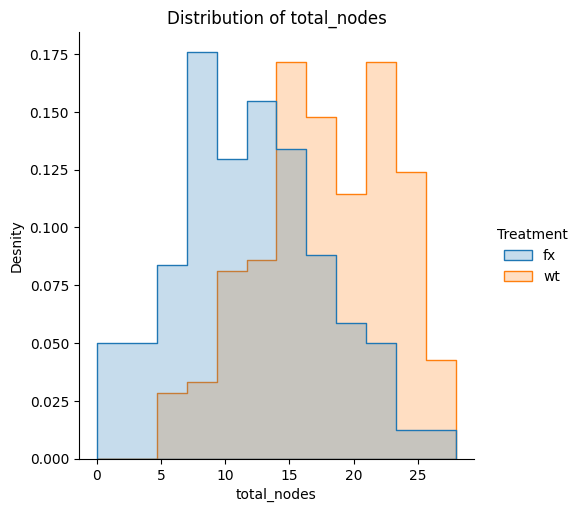

<Figure size 800x400 with 0 Axes>

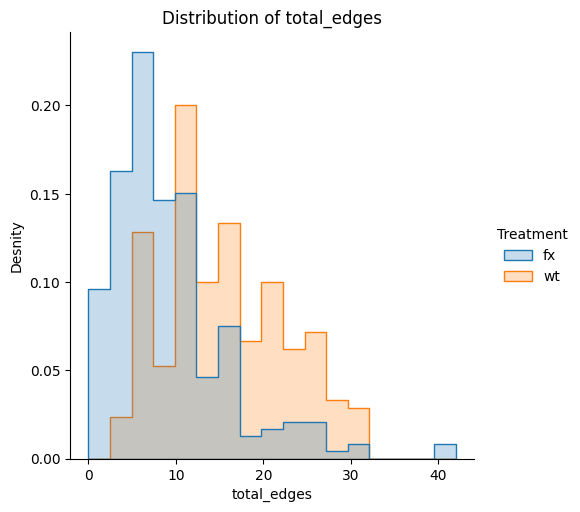

<Figure size 800x400 with 0 Axes>

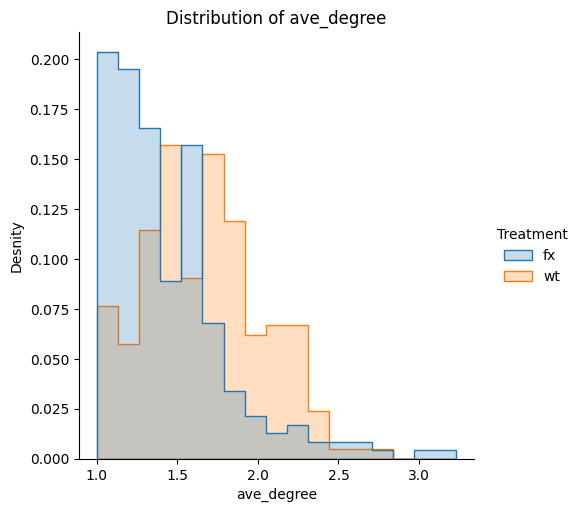

<Figure size 800x400 with 0 Axes>

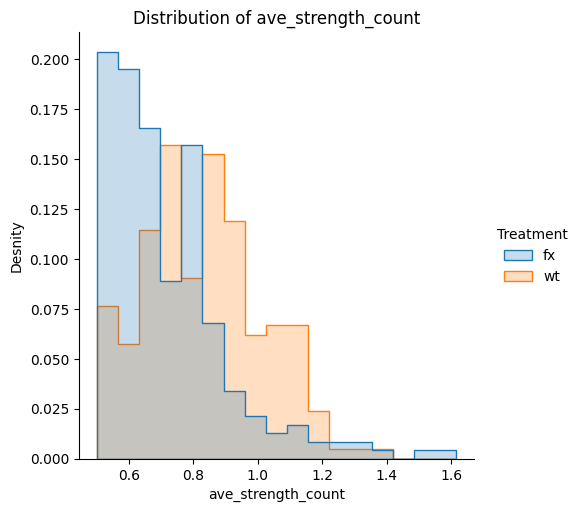

<Figure size 800x400 with 0 Axes>

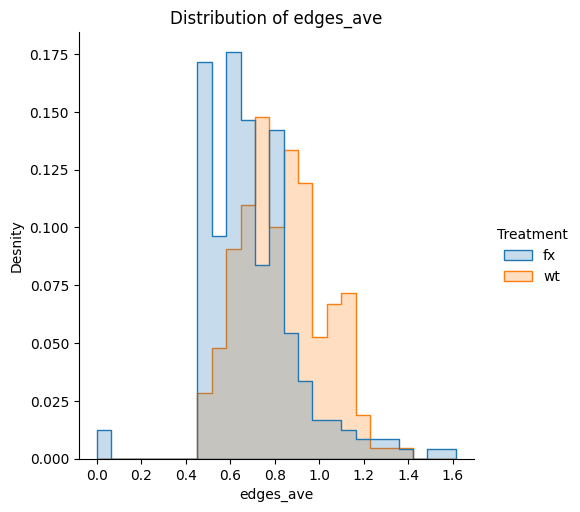

<Figure size 800x400 with 0 Axes>

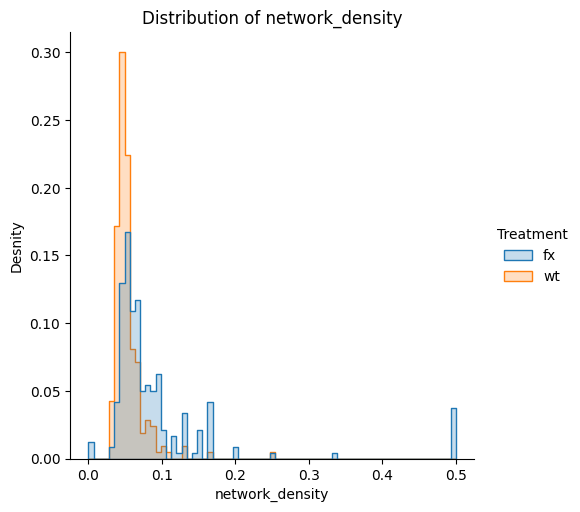

<Figure size 800x400 with 0 Axes>

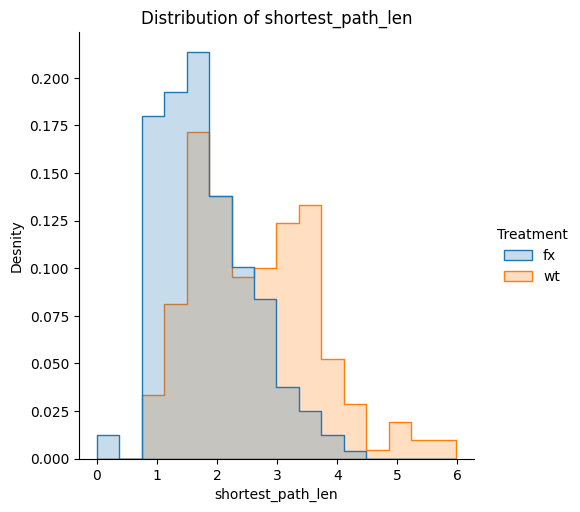

<Figure size 800x400 with 0 Axes>

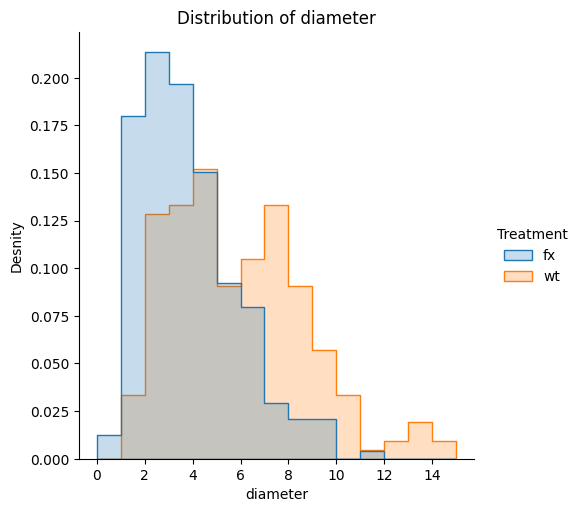

<Figure size 800x400 with 0 Axes>

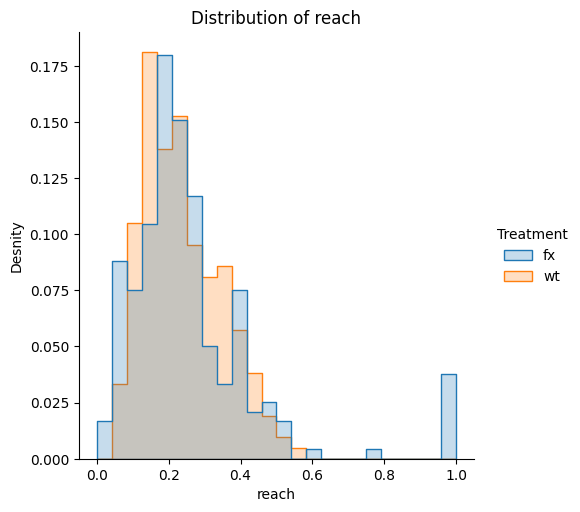

<Figure size 800x400 with 0 Axes>

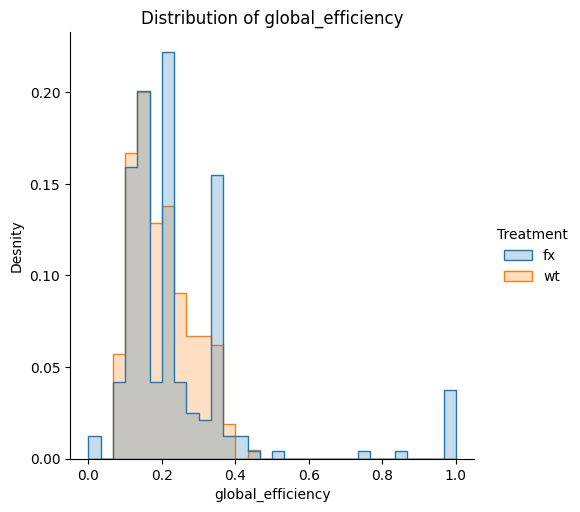

<Figure size 800x400 with 0 Axes>

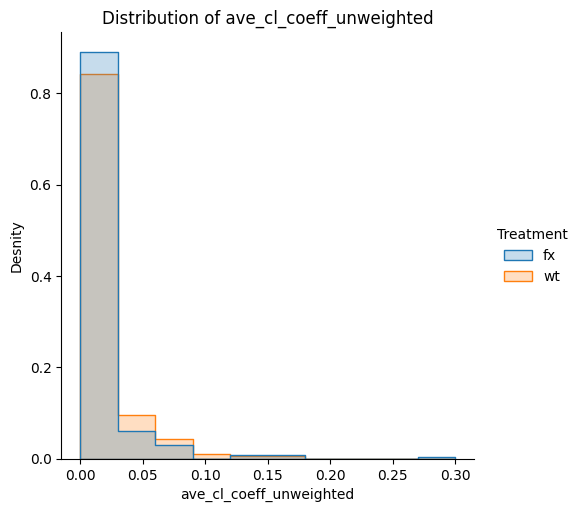

<Figure size 800x400 with 0 Axes>

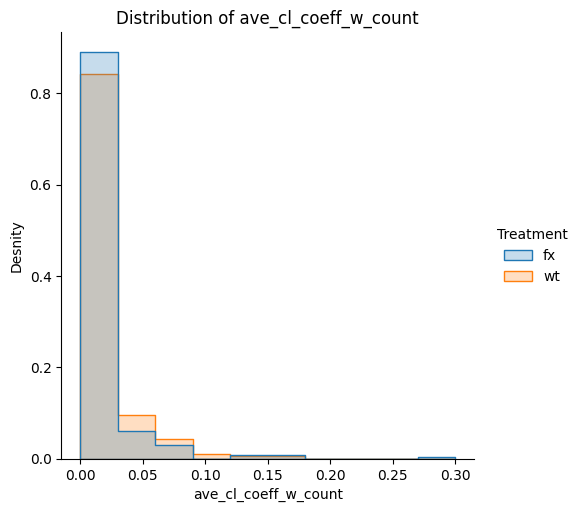

<Figure size 800x400 with 0 Axes>

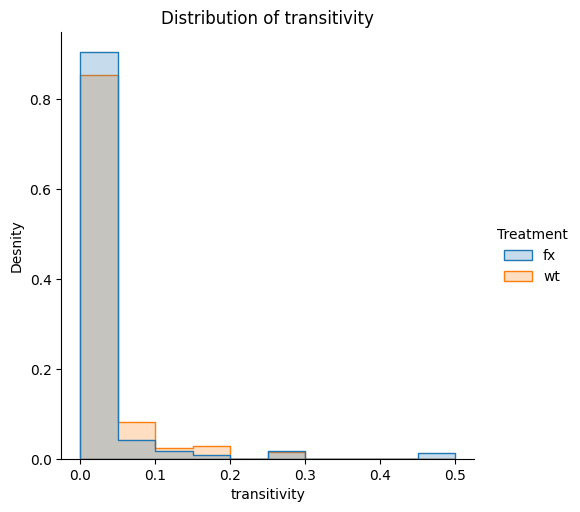

<Figure size 800x400 with 0 Axes>

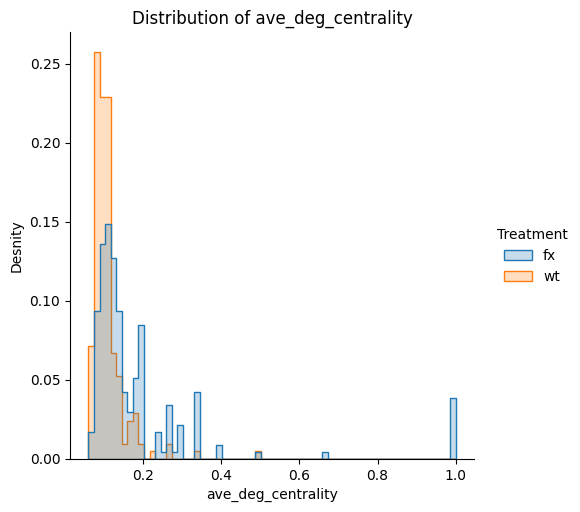

<Figure size 800x400 with 0 Axes>

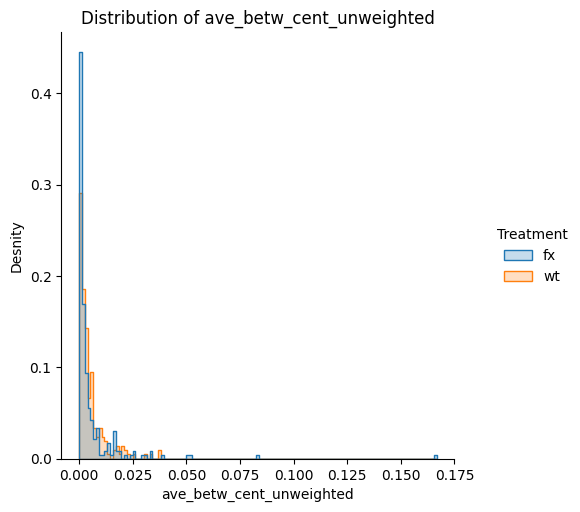

<Figure size 800x400 with 0 Axes>

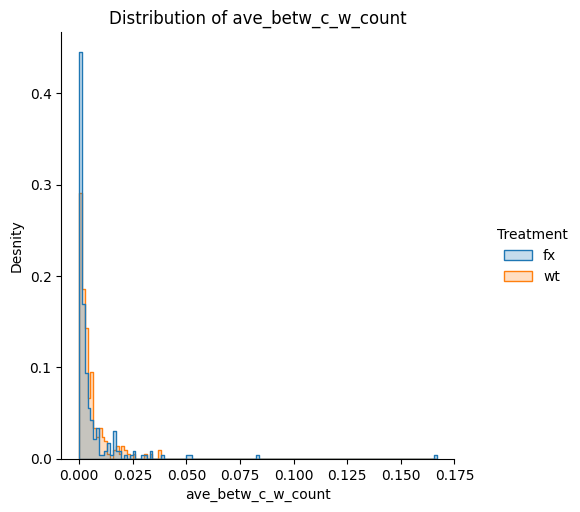

<Figure size 800x400 with 0 Axes>

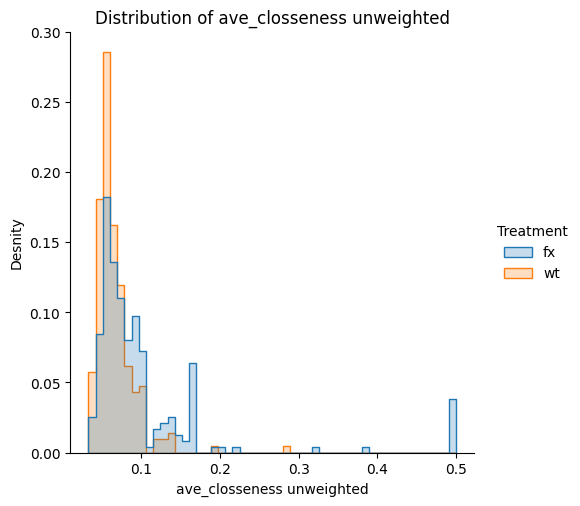

<Figure size 800x400 with 0 Axes>

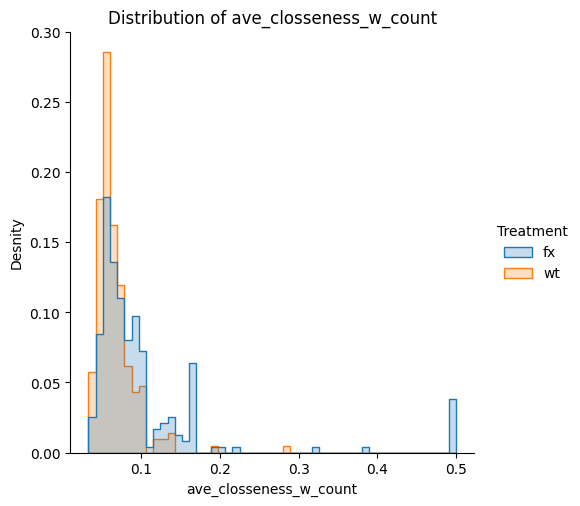

<Figure size 800x400 with 0 Axes>

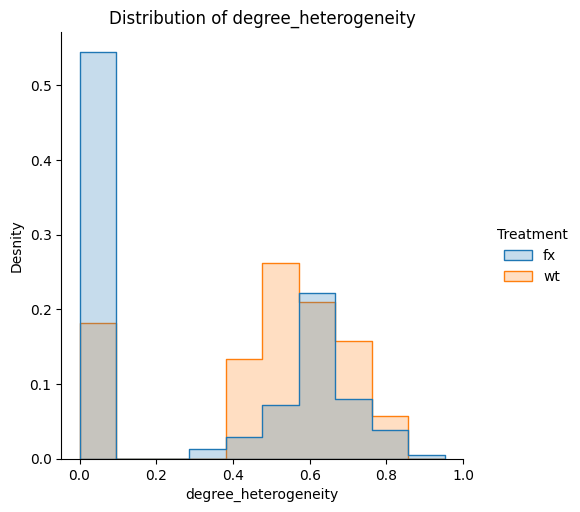

<Figure size 800x400 with 0 Axes>

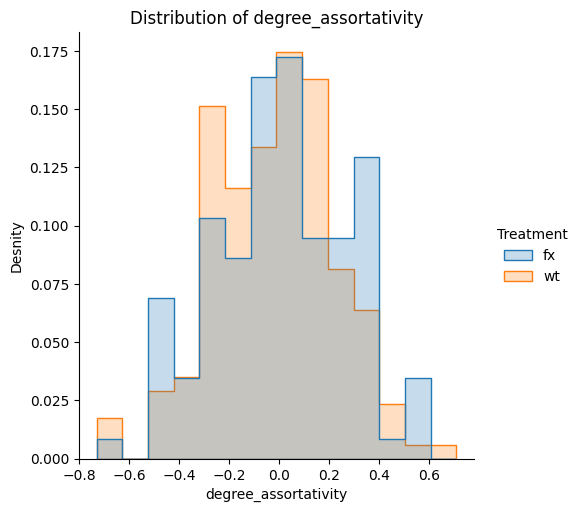

<Figure size 800x400 with 0 Axes>

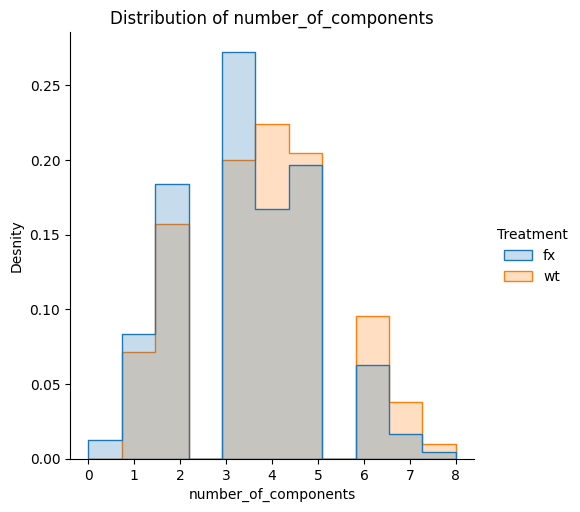

<Figure size 800x400 with 0 Axes>

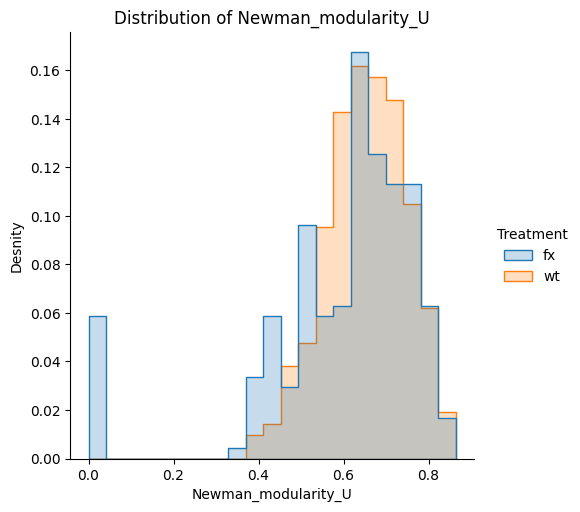

<Figure size 800x400 with 0 Axes>

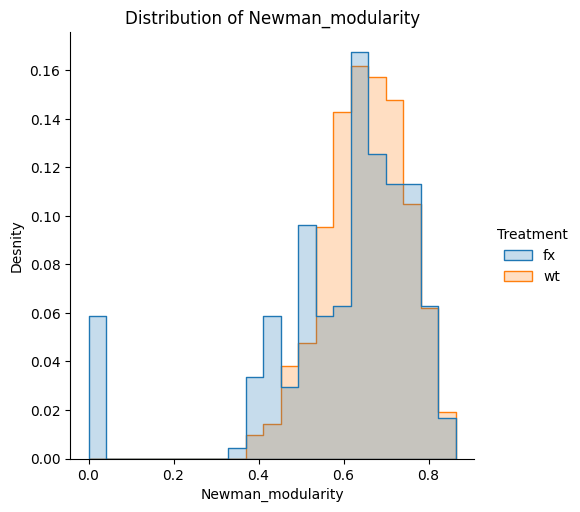

<Figure size 800x400 with 0 Axes>

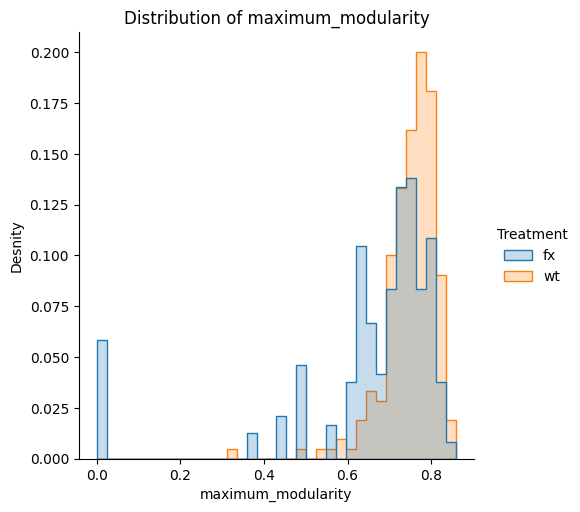

<Figure size 800x400 with 0 Axes>

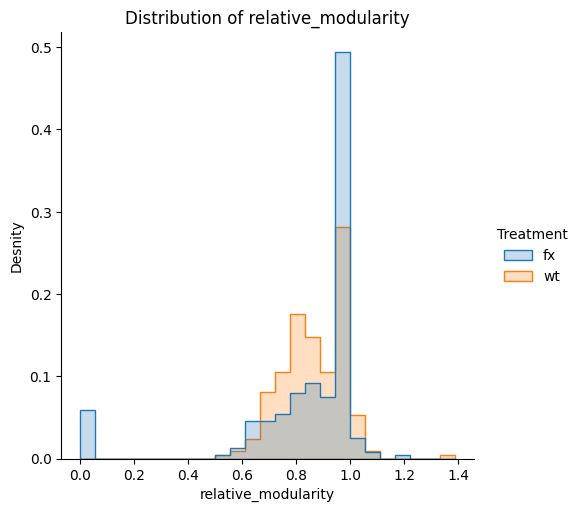

<Figure size 800x400 with 0 Axes>

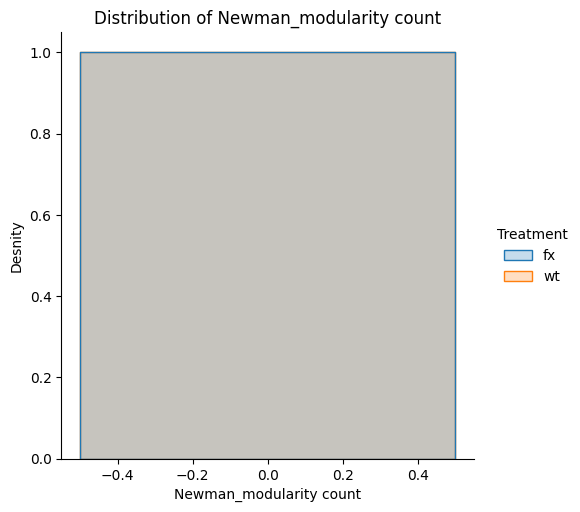

<Figure size 800x400 with 0 Axes>

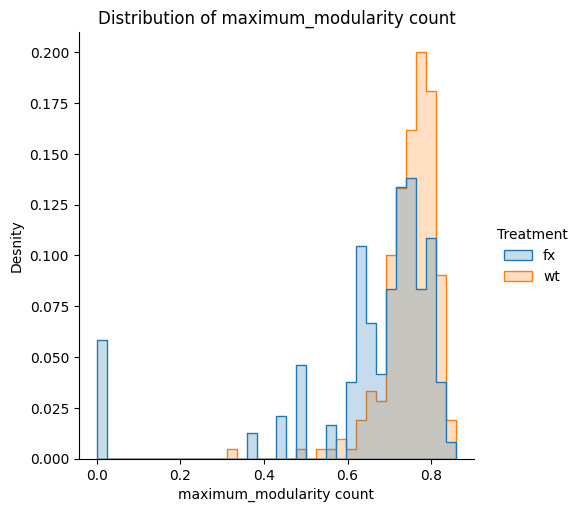

<Figure size 800x400 with 0 Axes>

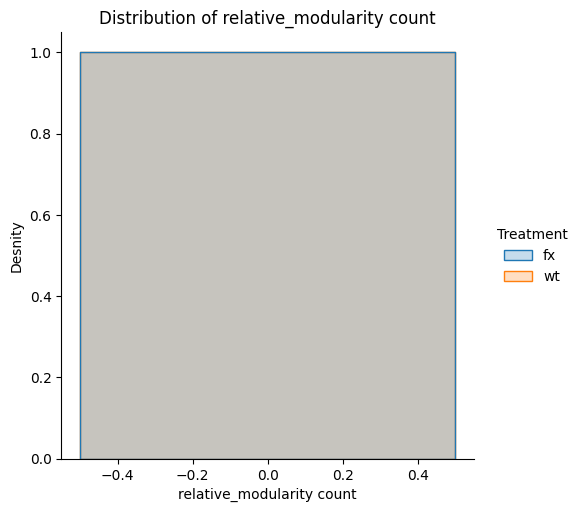

In [2]:
for measure_name in combined_data.columns:
    plt.figure(figsize=(8, 4))
    sns.displot(combined_data, x=measure_name, hue="Treatment",
                stat="probability", common_norm=False, element="step")  # element="step"
    plt.xlabel(measure_name)
    plt.ylabel('Desnity')
    plt.title(f'Distribution of {measure_name}')
    plt.show()

## Kernel density estimation

<Figure size 800x400 with 0 Axes>

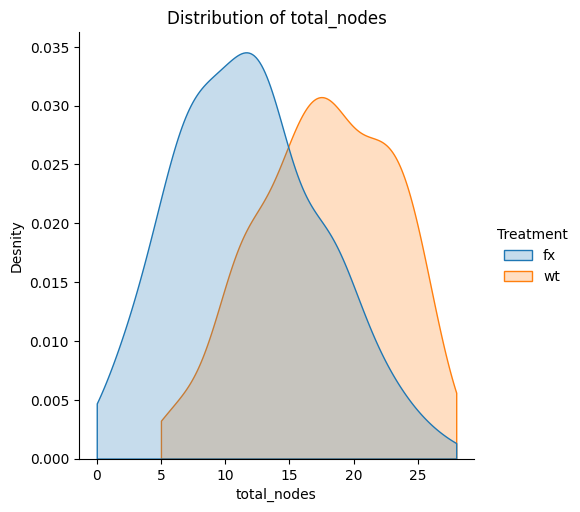

<Figure size 800x400 with 0 Axes>

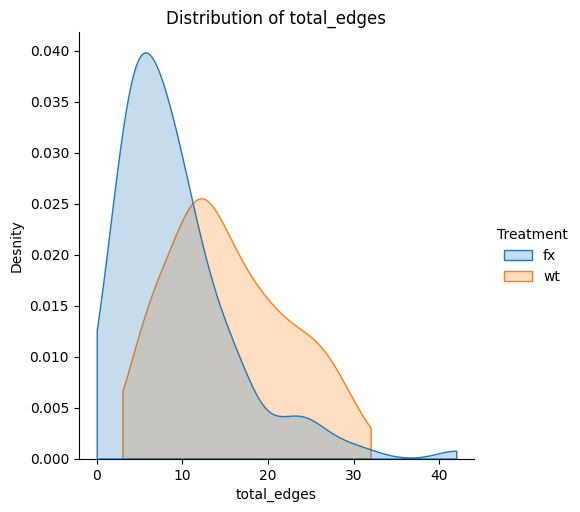

<Figure size 800x400 with 0 Axes>

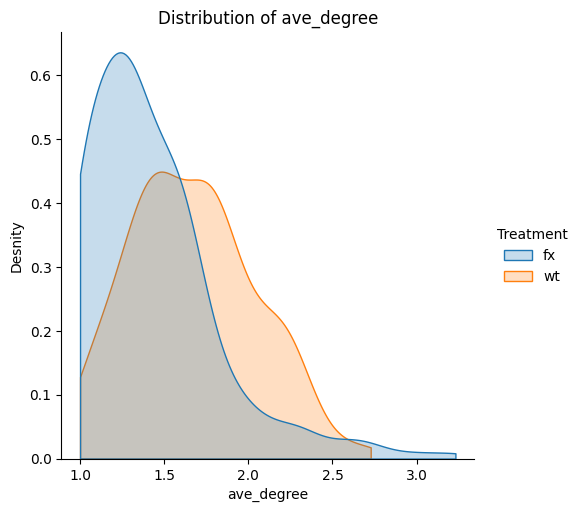

<Figure size 800x400 with 0 Axes>

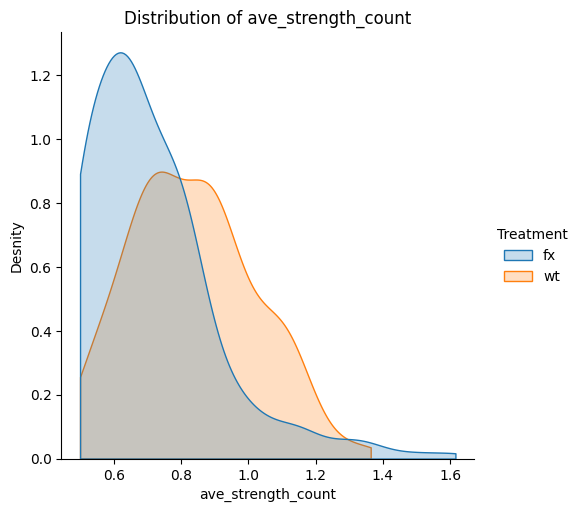

<Figure size 800x400 with 0 Axes>

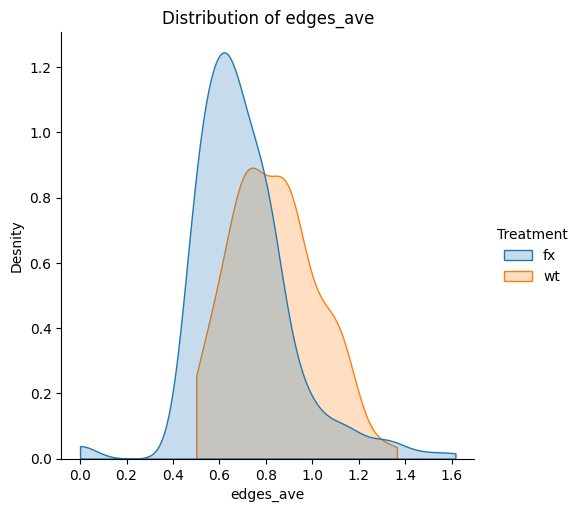

<Figure size 800x400 with 0 Axes>

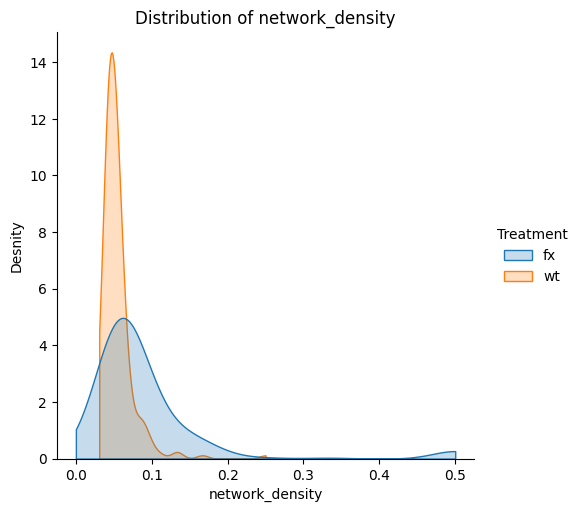

<Figure size 800x400 with 0 Axes>

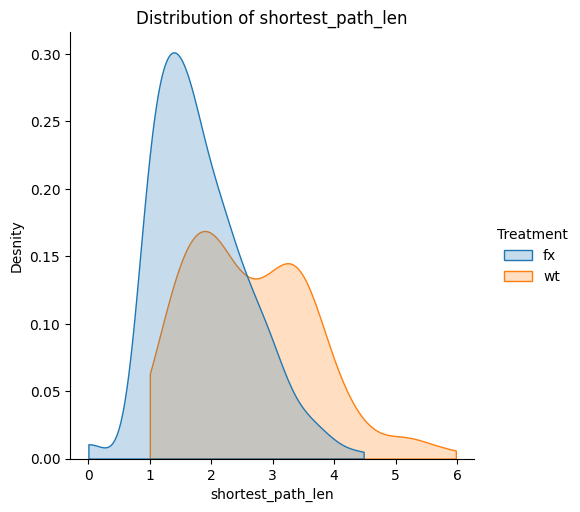

<Figure size 800x400 with 0 Axes>

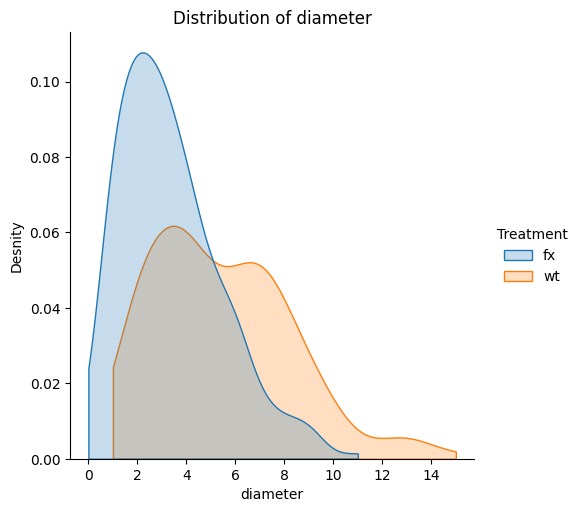

<Figure size 800x400 with 0 Axes>

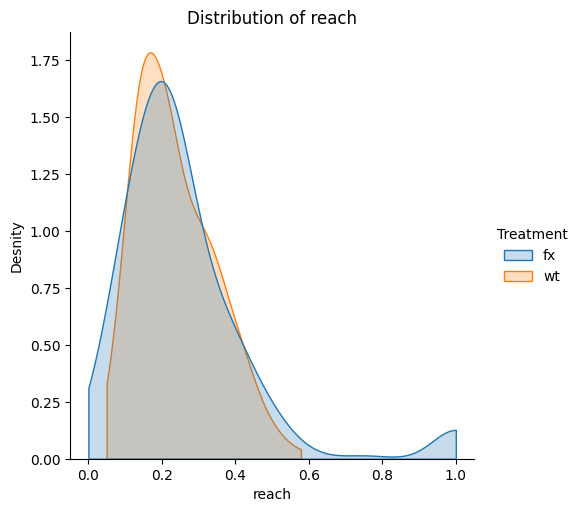

<Figure size 800x400 with 0 Axes>

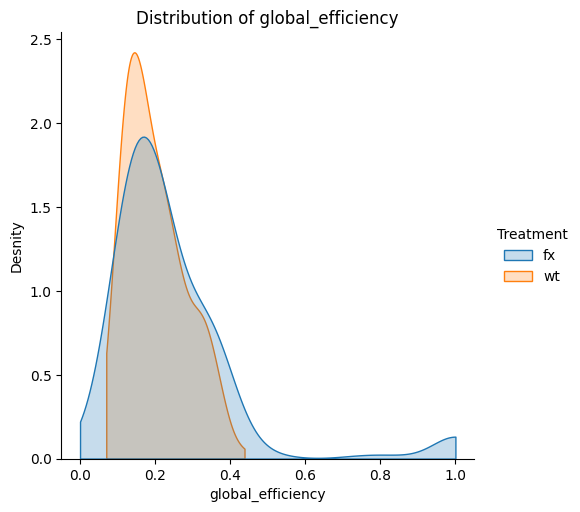

<Figure size 800x400 with 0 Axes>

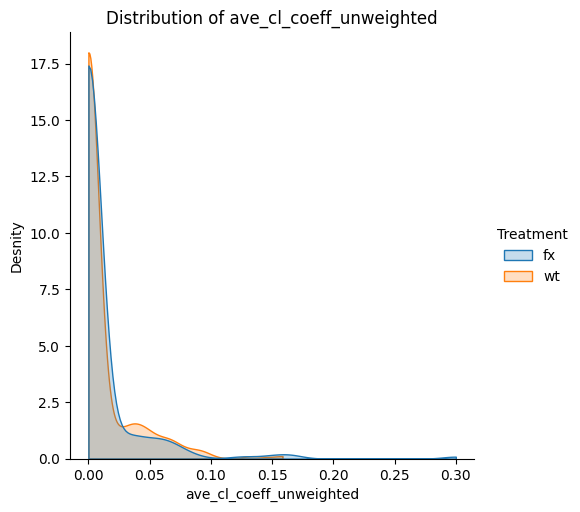

<Figure size 800x400 with 0 Axes>

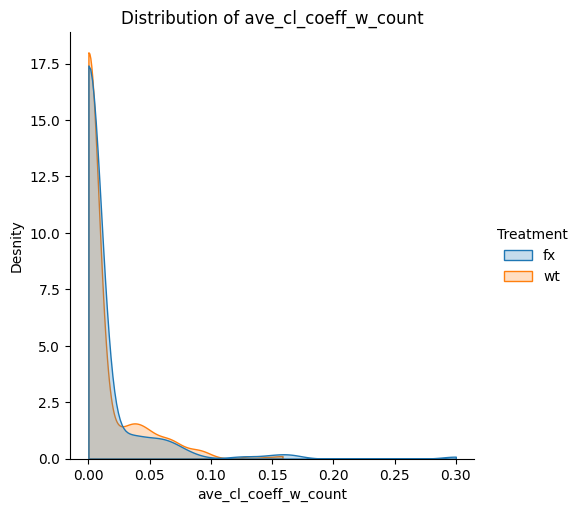

<Figure size 800x400 with 0 Axes>

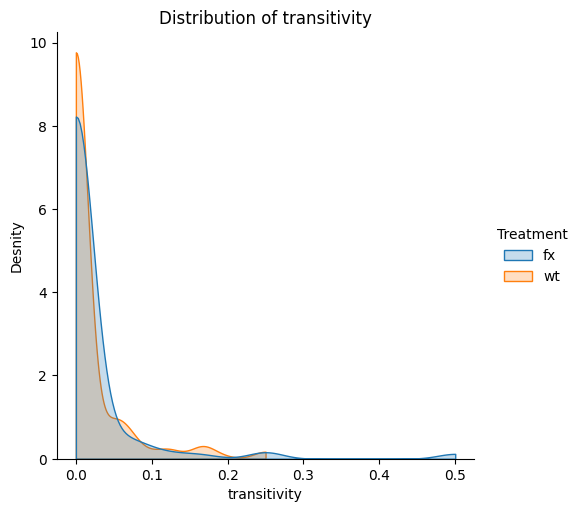

<Figure size 800x400 with 0 Axes>

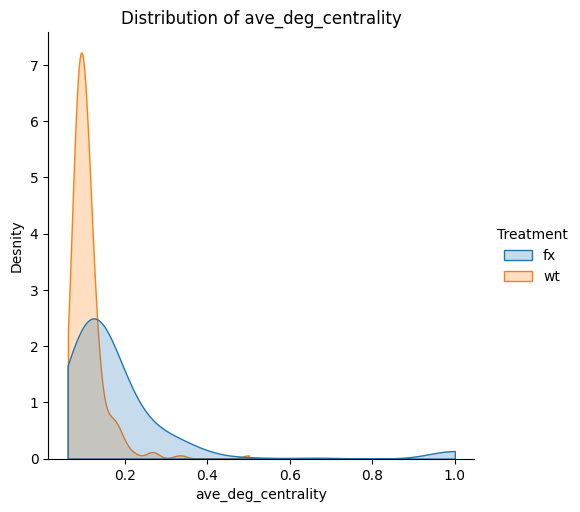

<Figure size 800x400 with 0 Axes>

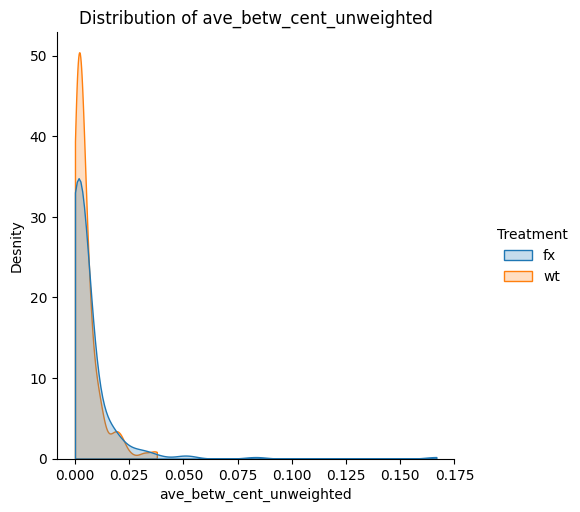

<Figure size 800x400 with 0 Axes>

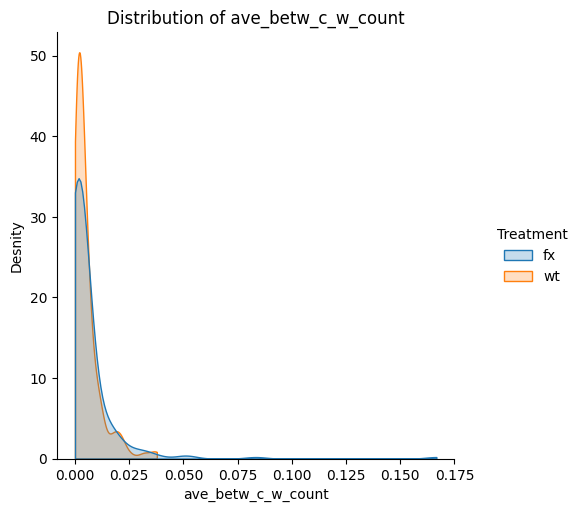

<Figure size 800x400 with 0 Axes>

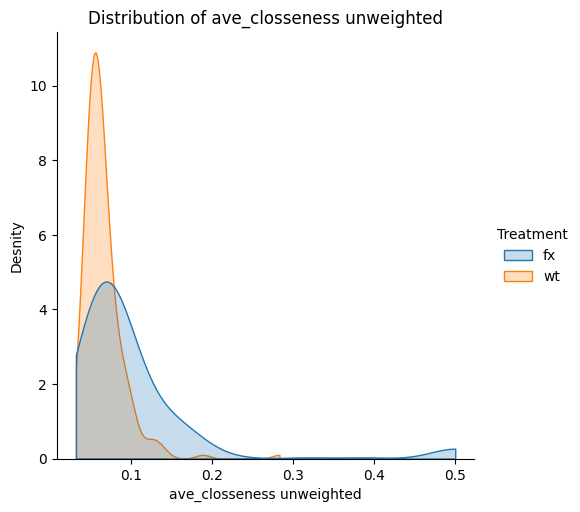

<Figure size 800x400 with 0 Axes>

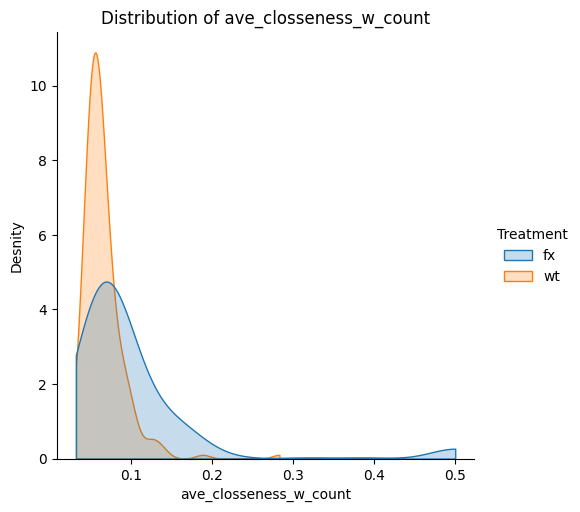

<Figure size 800x400 with 0 Axes>

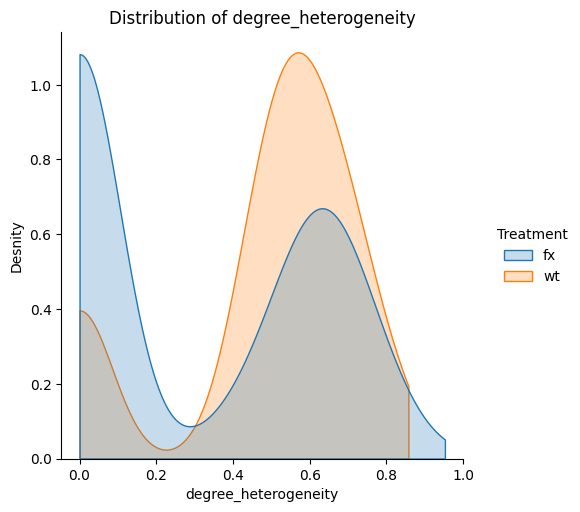

<Figure size 800x400 with 0 Axes>

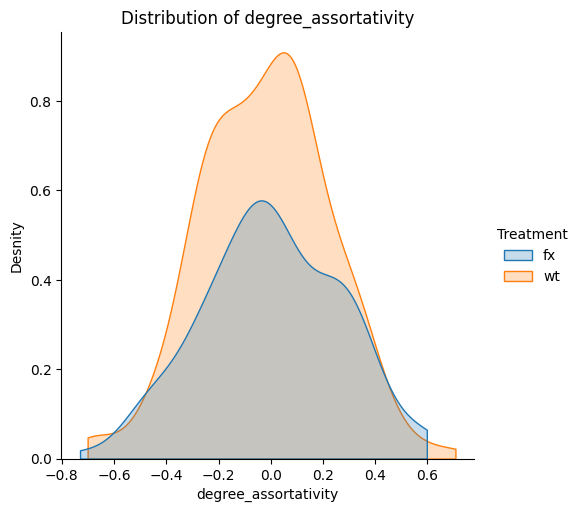

<Figure size 800x400 with 0 Axes>

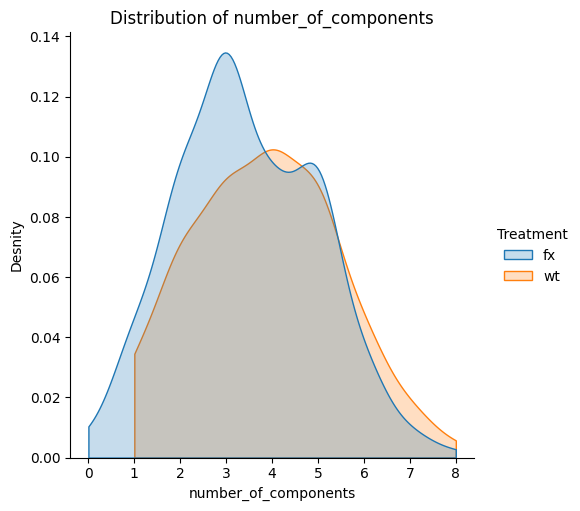

<Figure size 800x400 with 0 Axes>

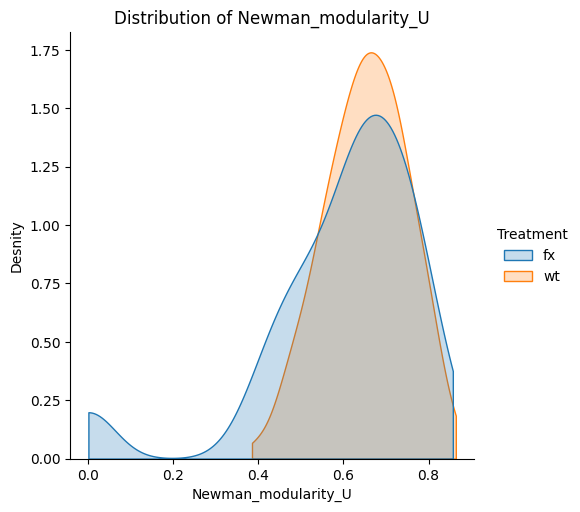

<Figure size 800x400 with 0 Axes>

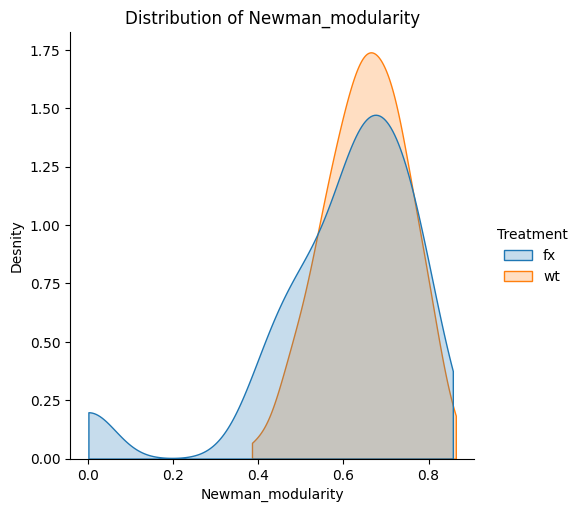

<Figure size 800x400 with 0 Axes>

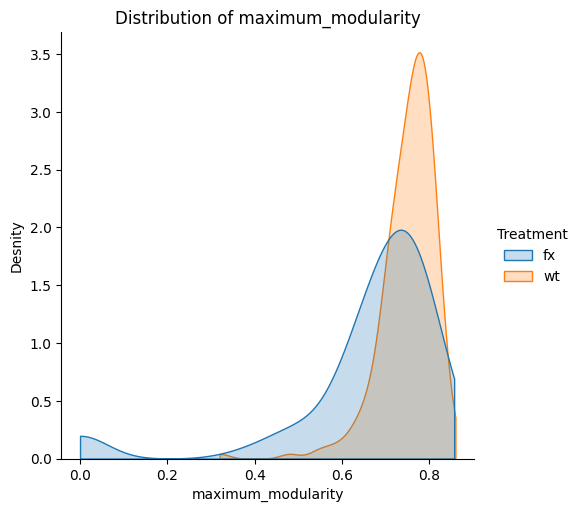

<Figure size 800x400 with 0 Axes>

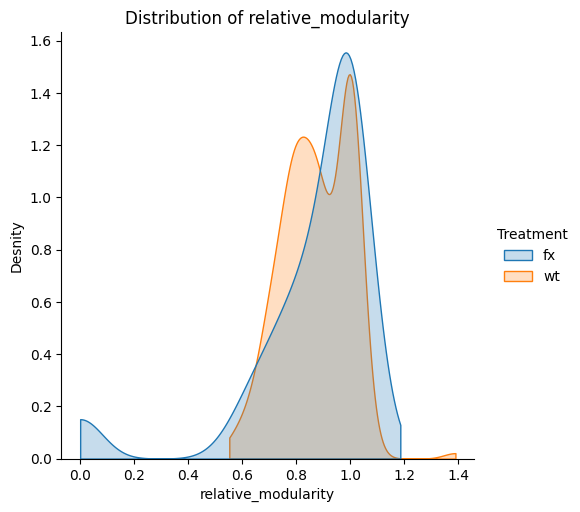

/tmp/ipykernel_181633/3094235146.py:3: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  sns.displot(combined_data, x=measure_name, hue="Treatment", kind="kde", fill=True, cut=0)


<Figure size 800x400 with 0 Axes>

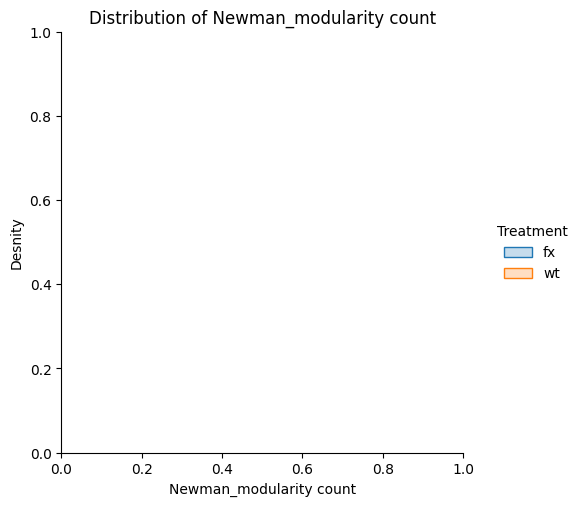

<Figure size 800x400 with 0 Axes>

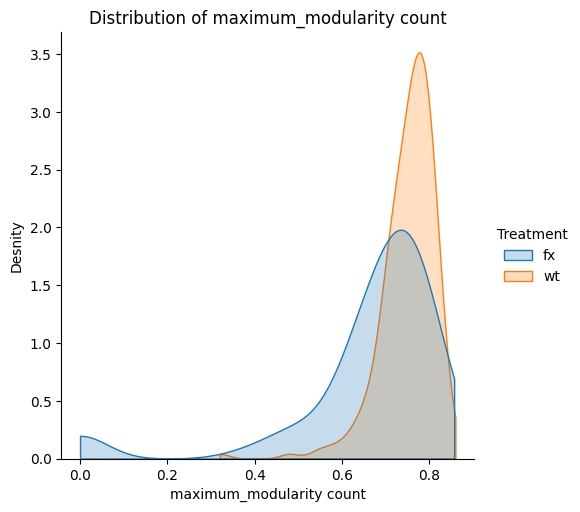

/tmp/ipykernel_181633/3094235146.py:3: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  sns.displot(combined_data, x=measure_name, hue="Treatment", kind="kde", fill=True, cut=0)


<Figure size 800x400 with 0 Axes>

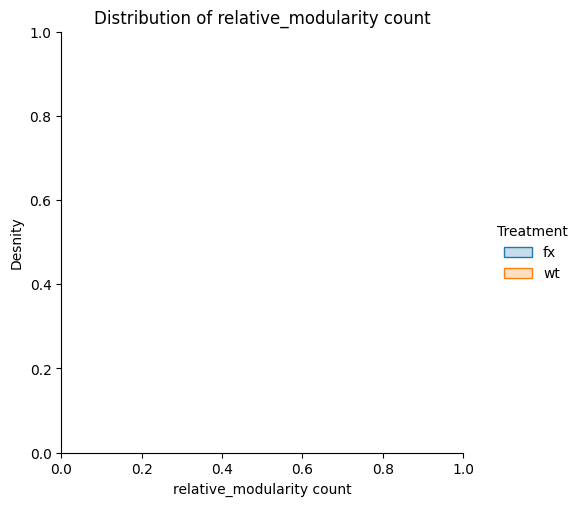

In [4]:
for measure_name in combined_data.columns:
    plt.figure(figsize=(8, 4))
    sns.displot(combined_data, x=measure_name, hue="Treatment", kind="kde", fill=True, cut=0) 
    plt.xlabel(measure_name)
    plt.ylabel('Desnity')
    plt.title(f'Distribution of {measure_name}')
    plt.show()

## KDE with histograms

<Figure size 800x400 with 0 Axes>

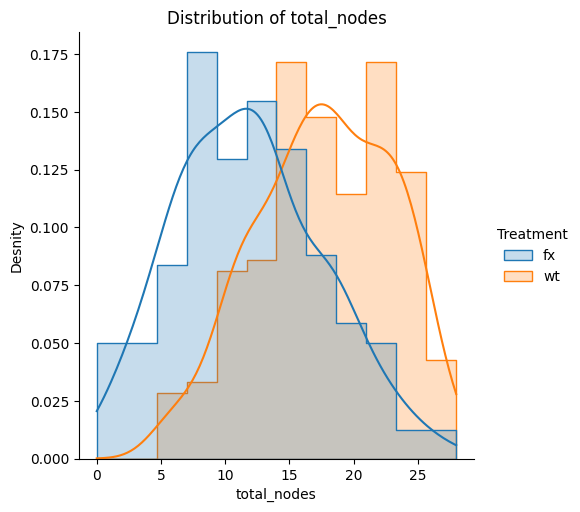

<Figure size 800x400 with 0 Axes>

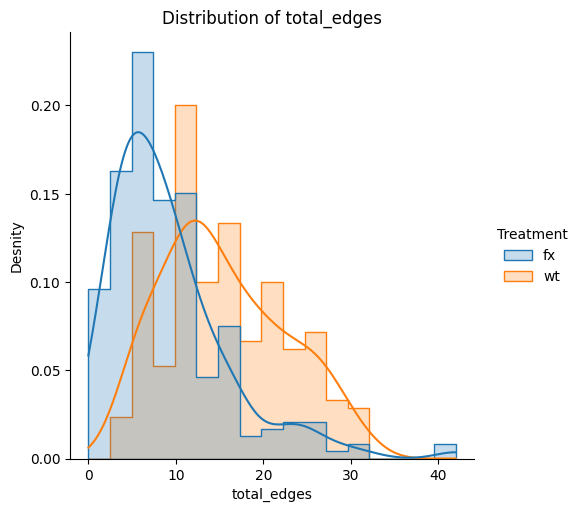

<Figure size 800x400 with 0 Axes>

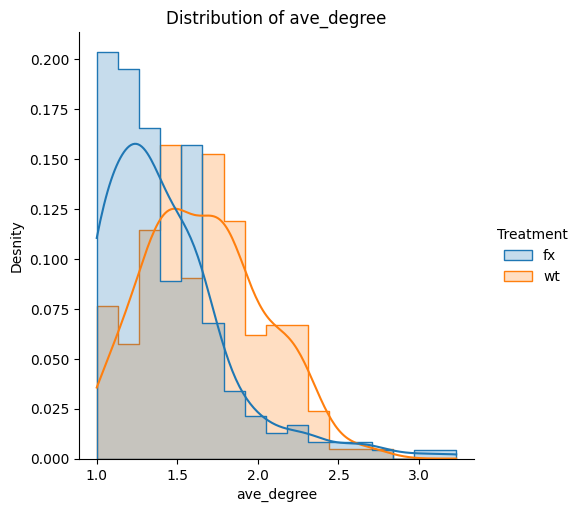

<Figure size 800x400 with 0 Axes>

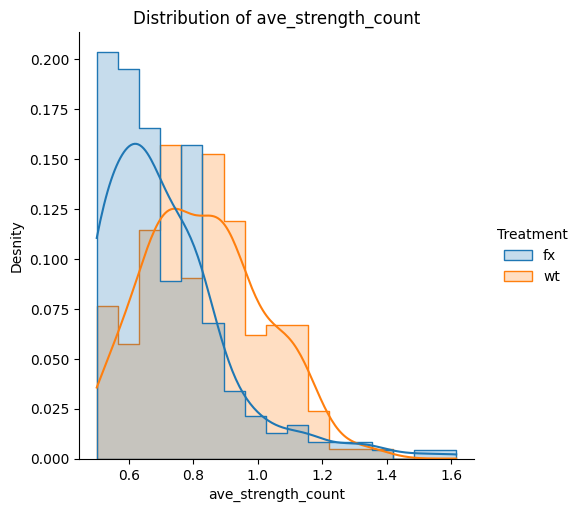

<Figure size 800x400 with 0 Axes>

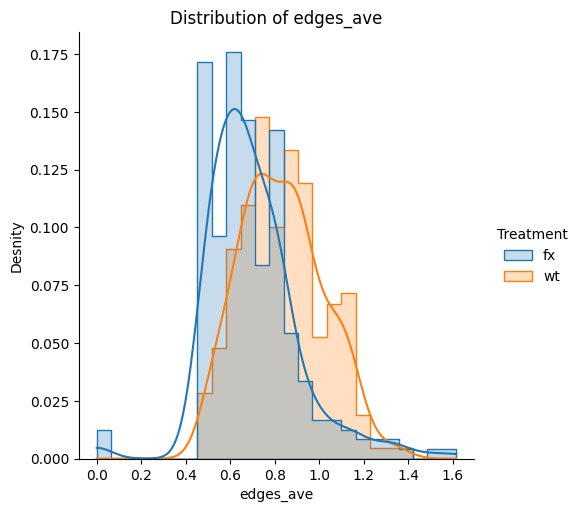

<Figure size 800x400 with 0 Axes>

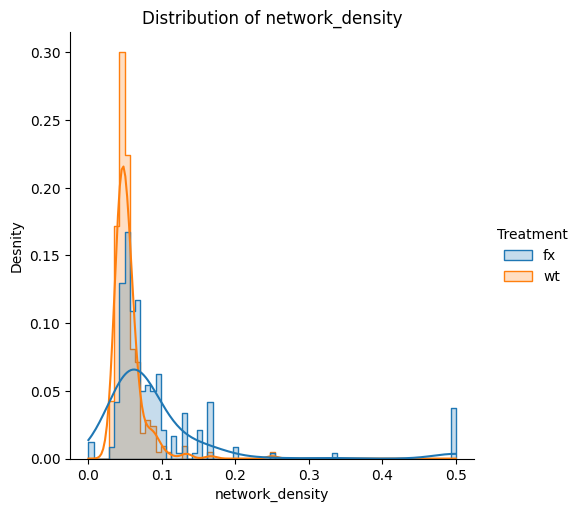

<Figure size 800x400 with 0 Axes>

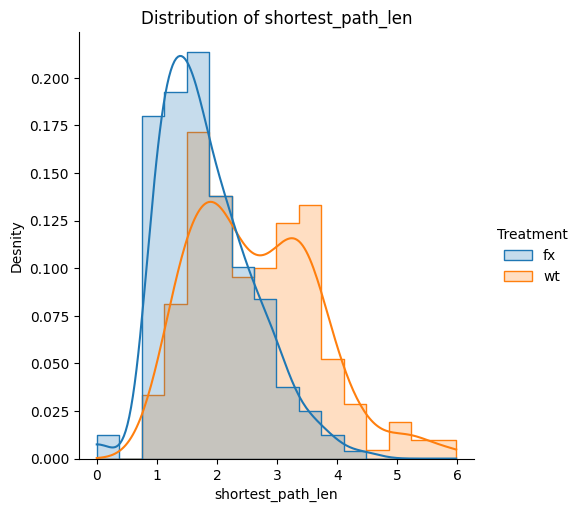

<Figure size 800x400 with 0 Axes>

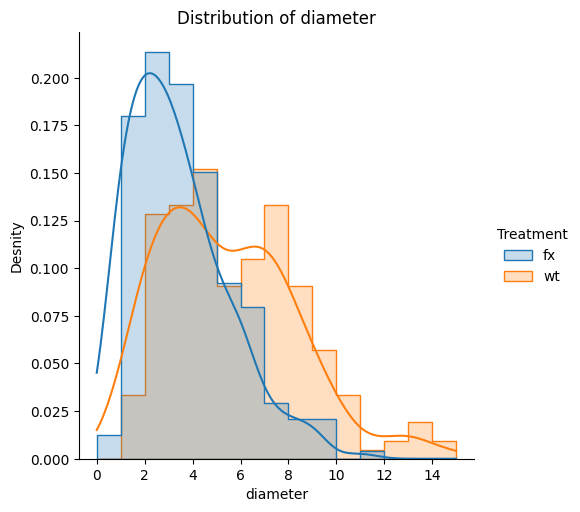

<Figure size 800x400 with 0 Axes>

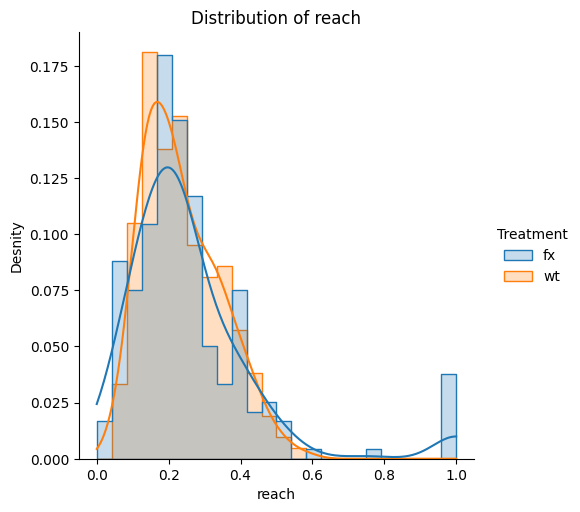

<Figure size 800x400 with 0 Axes>

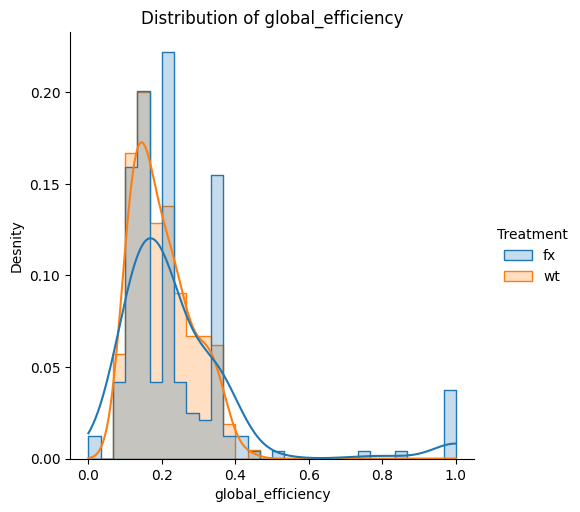

<Figure size 800x400 with 0 Axes>

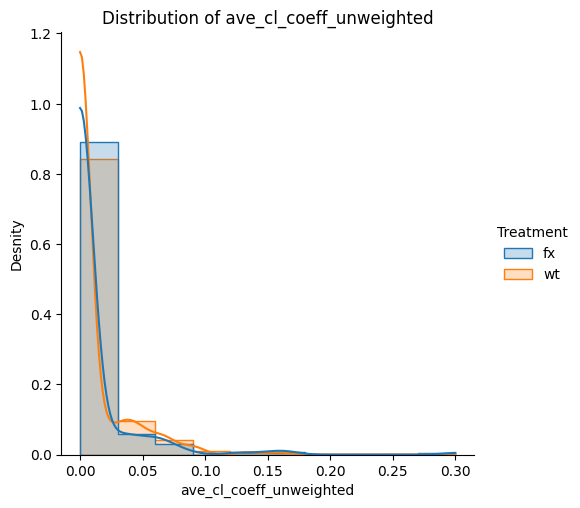

<Figure size 800x400 with 0 Axes>

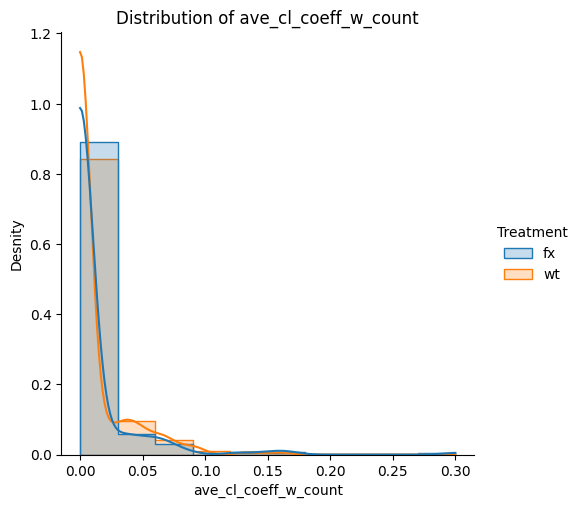

<Figure size 800x400 with 0 Axes>

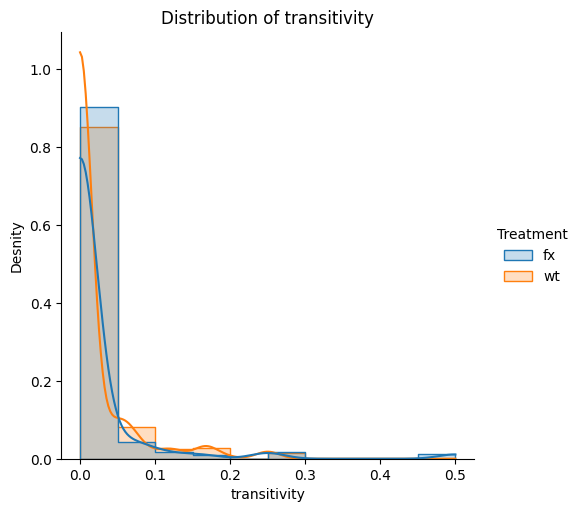

<Figure size 800x400 with 0 Axes>

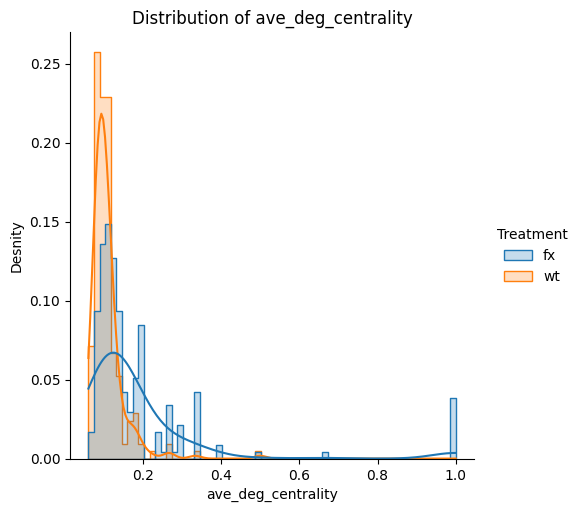

<Figure size 800x400 with 0 Axes>

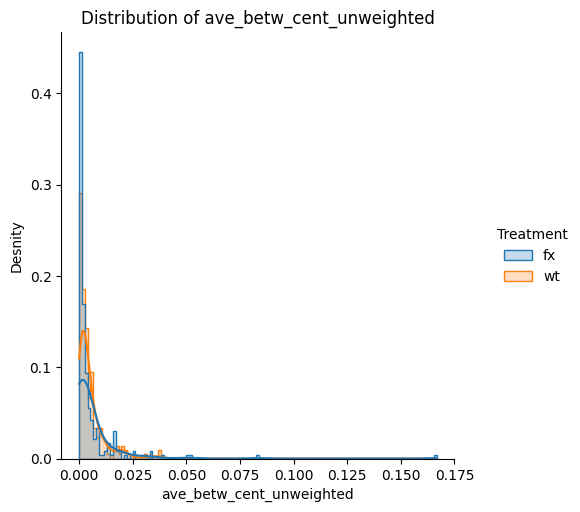

<Figure size 800x400 with 0 Axes>

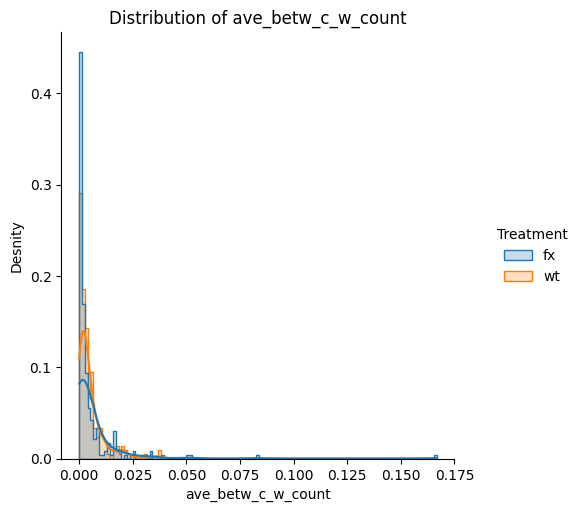

<Figure size 800x400 with 0 Axes>

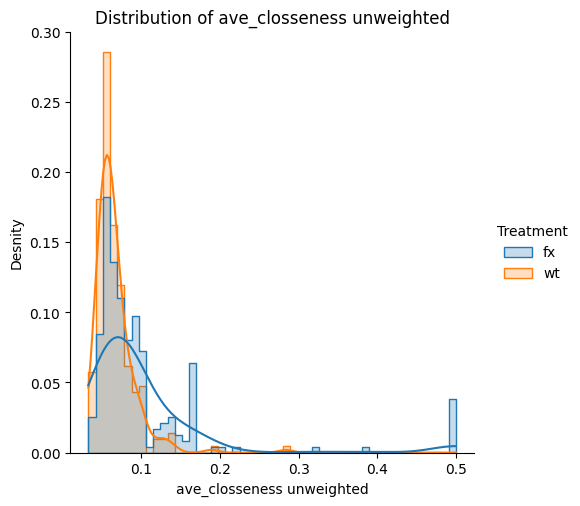

<Figure size 800x400 with 0 Axes>

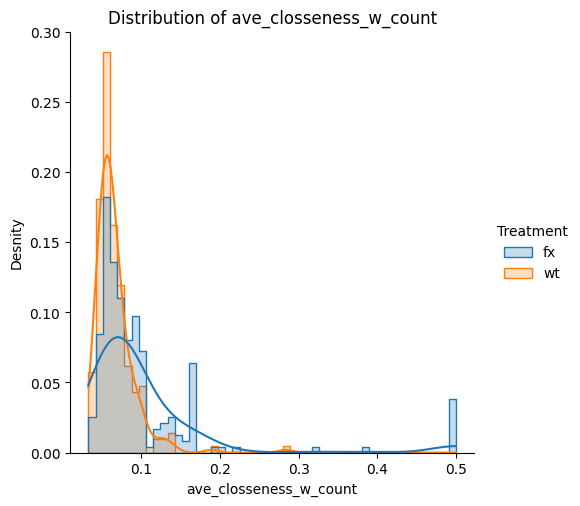

<Figure size 800x400 with 0 Axes>

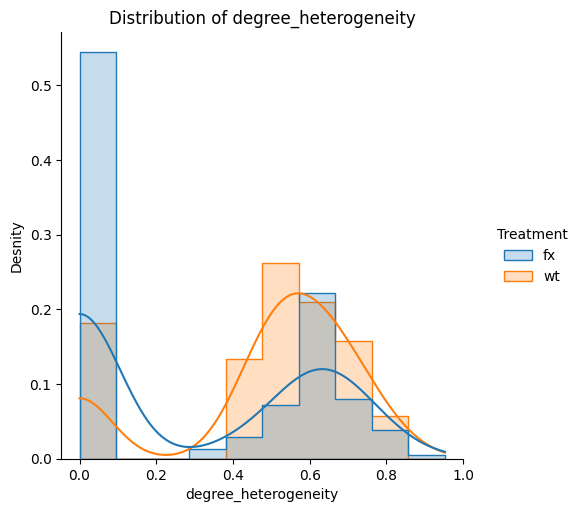

<Figure size 800x400 with 0 Axes>

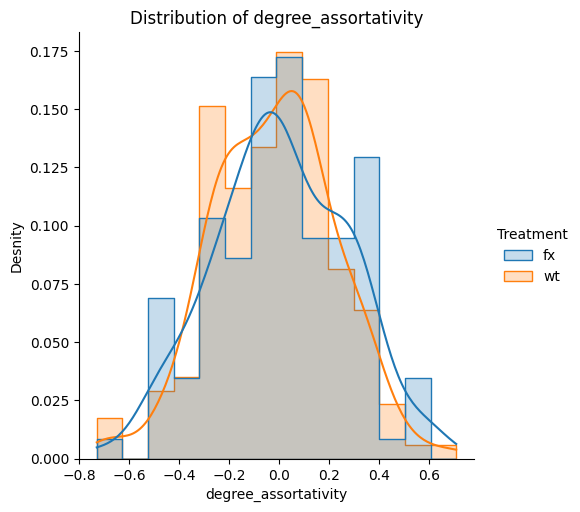

<Figure size 800x400 with 0 Axes>

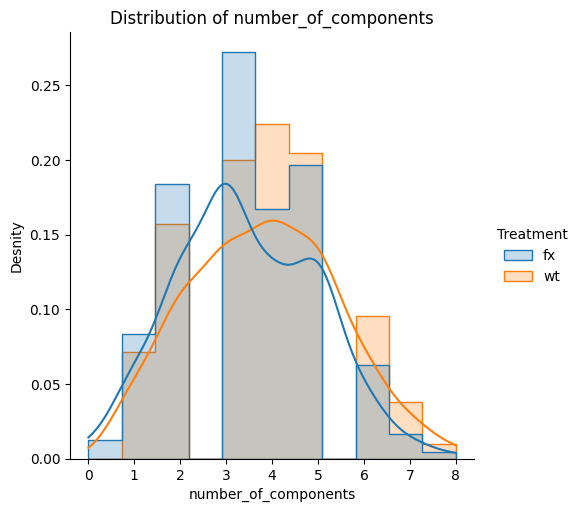

<Figure size 800x400 with 0 Axes>

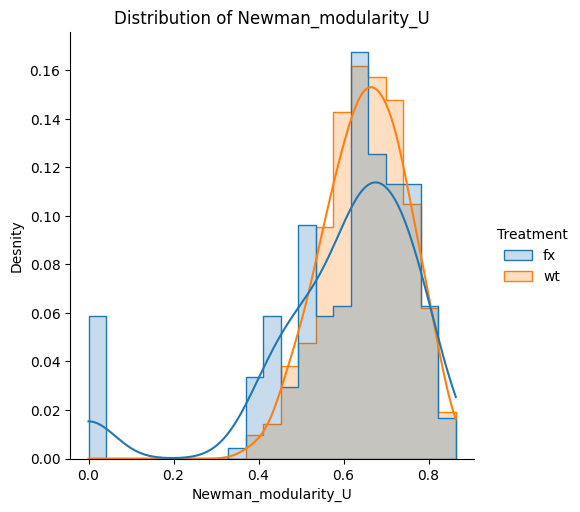

<Figure size 800x400 with 0 Axes>

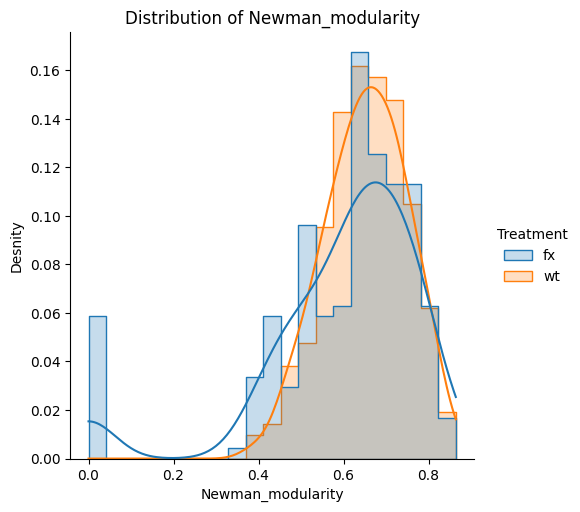

<Figure size 800x400 with 0 Axes>

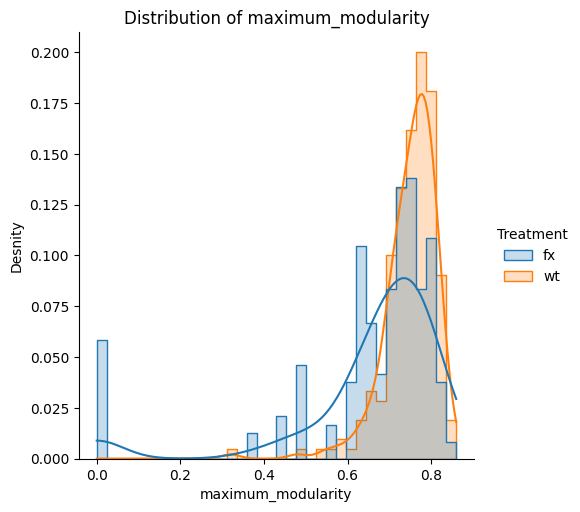

<Figure size 800x400 with 0 Axes>

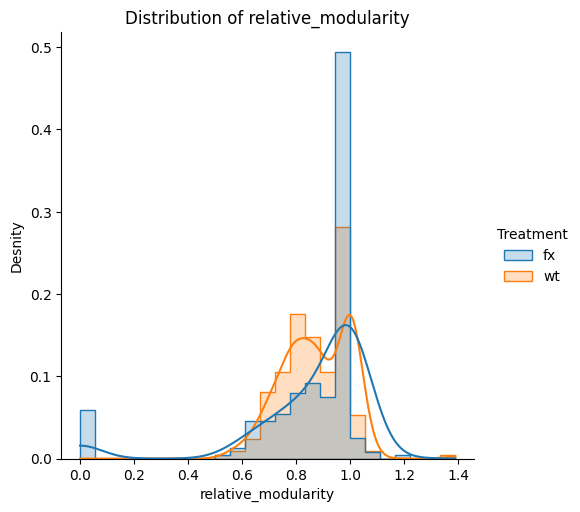

LinAlgError: The data appears to lie in a lower-dimensional subspace of the space in which it is expressed. This has resulted in a singular data covariance matrix, which cannot be treated using the algorithms implemented in `gaussian_kde`. Consider performing principle component analysis / dimensionality reduction and using `gaussian_kde` with the transformed data.

<Figure size 800x400 with 0 Axes>

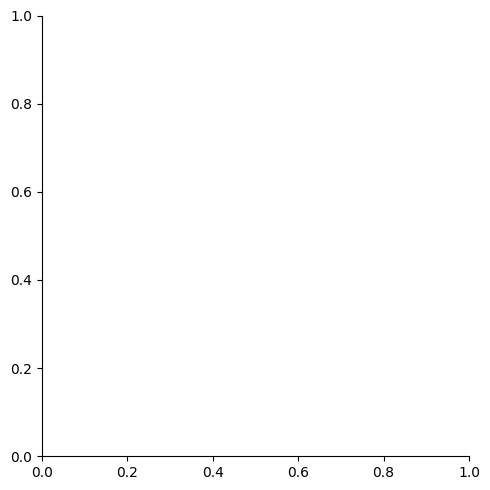

In [5]:
for measure_name in combined_data.columns:
    plt.figure(figsize=(8, 4))
    sns.displot(combined_data, x=measure_name, hue="Treatment",
                stat="probability", common_norm=False, element="step", kde=True) 
    plt.xlabel(measure_name)
    plt.ylabel('Desnity')
    plt.title(f'Distribution of {measure_name}')
    plt.show()

## Empirical cumulative distributions

<Figure size 600x400 with 0 Axes>

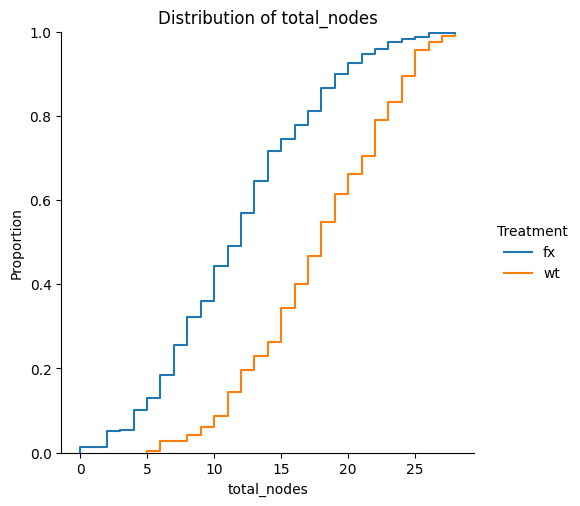

<Figure size 600x400 with 0 Axes>

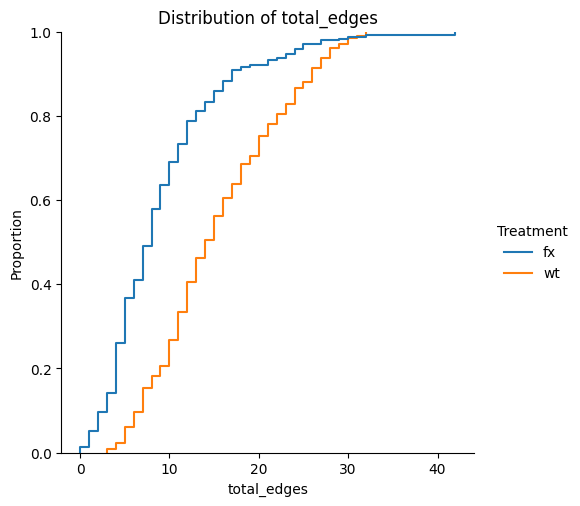

<Figure size 600x400 with 0 Axes>

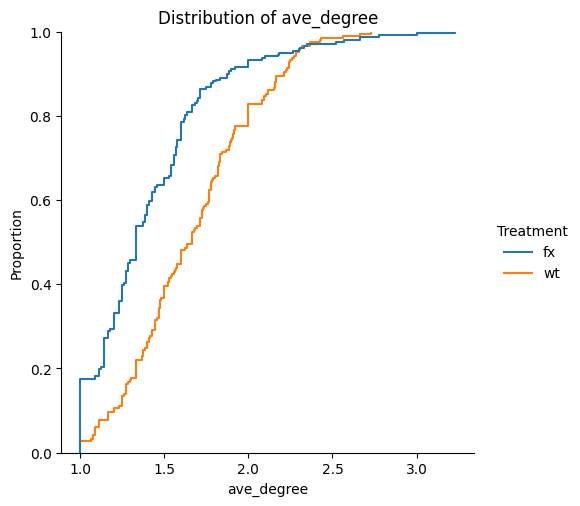

<Figure size 600x400 with 0 Axes>

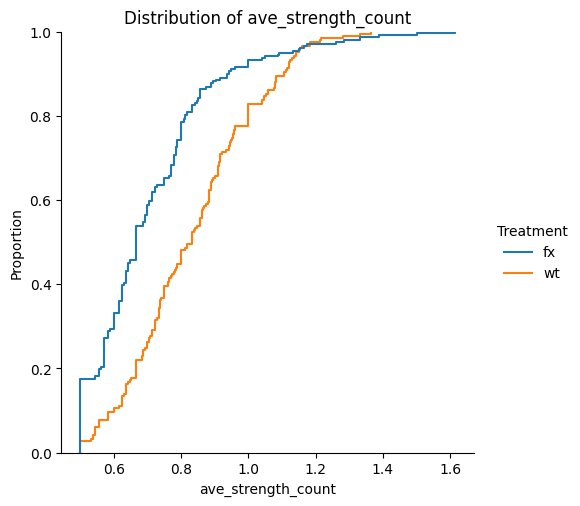

<Figure size 600x400 with 0 Axes>

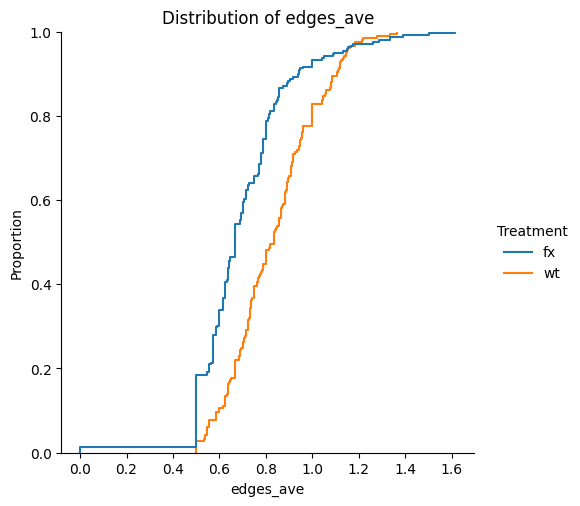

<Figure size 600x400 with 0 Axes>

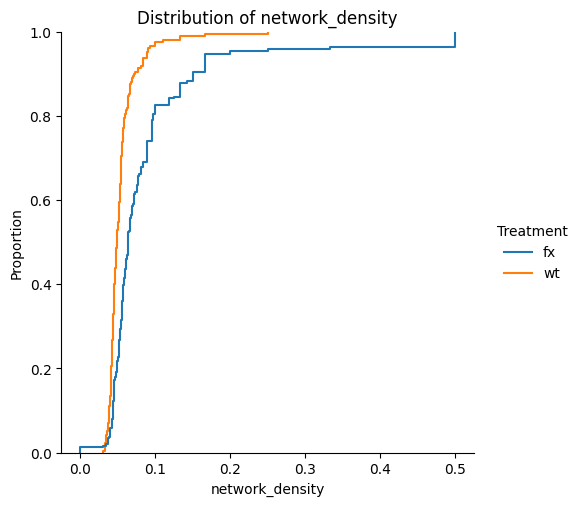

<Figure size 600x400 with 0 Axes>

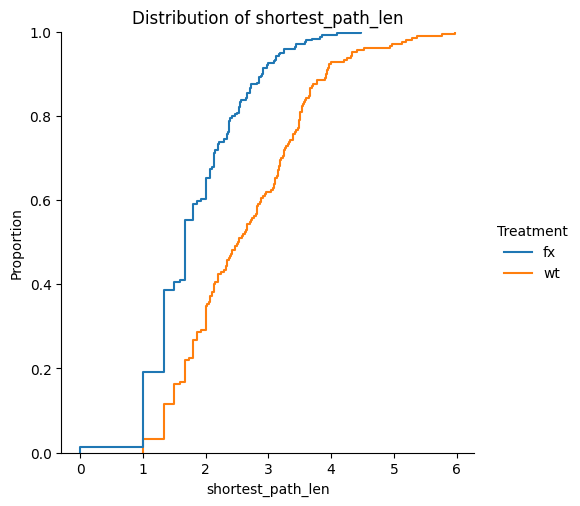

<Figure size 600x400 with 0 Axes>

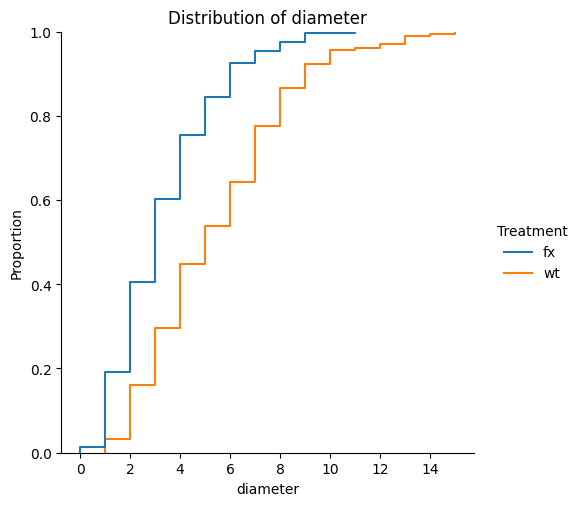

<Figure size 600x400 with 0 Axes>

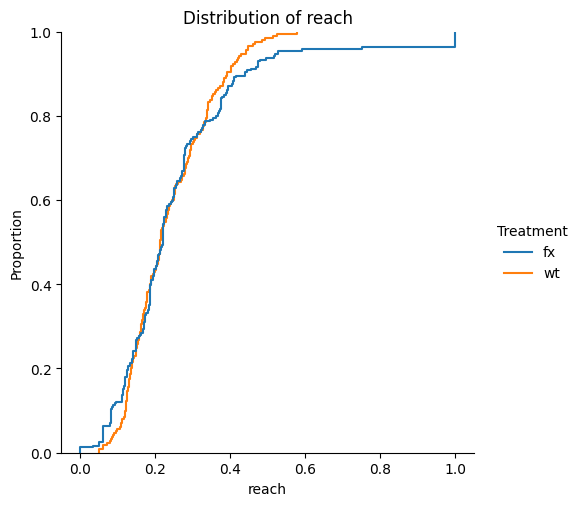

<Figure size 600x400 with 0 Axes>

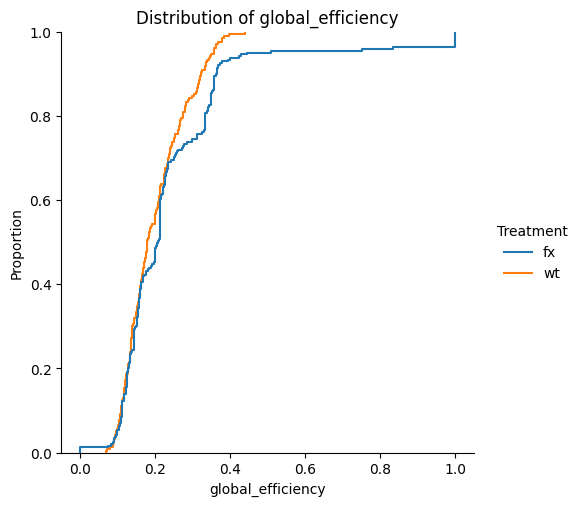

<Figure size 600x400 with 0 Axes>

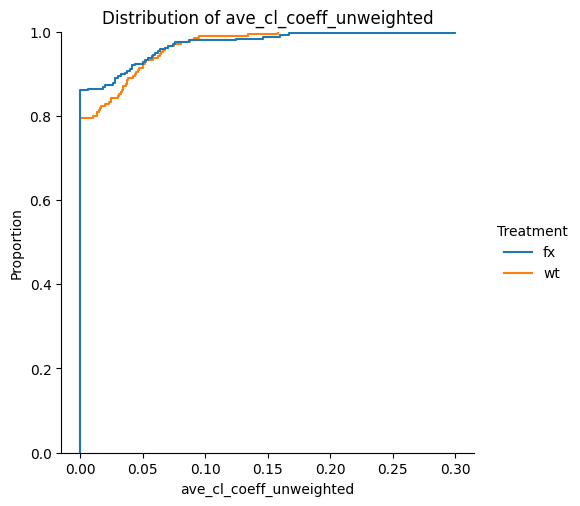

<Figure size 600x400 with 0 Axes>

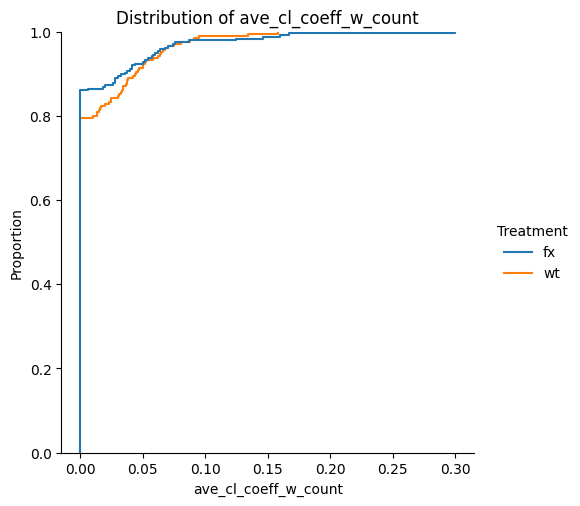

<Figure size 600x400 with 0 Axes>

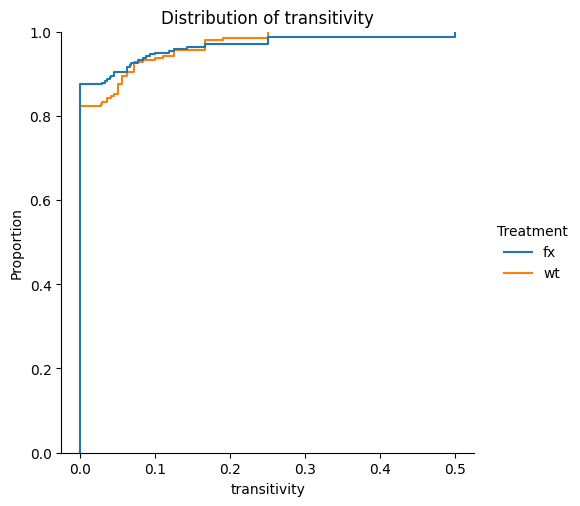

<Figure size 600x400 with 0 Axes>

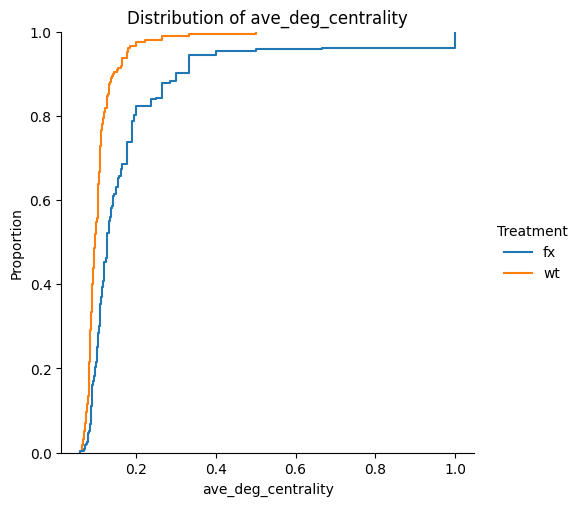

<Figure size 600x400 with 0 Axes>

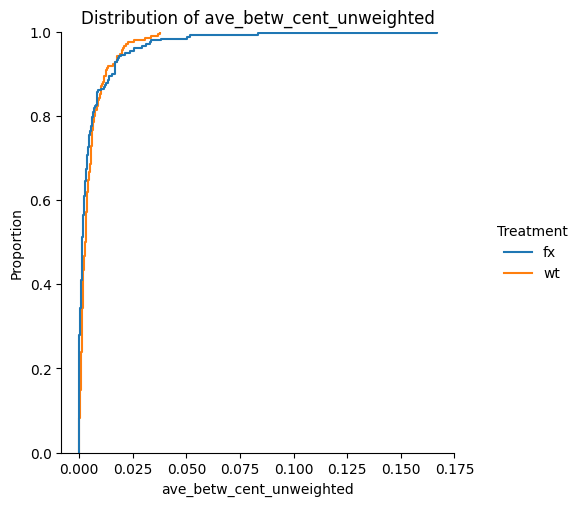

<Figure size 600x400 with 0 Axes>

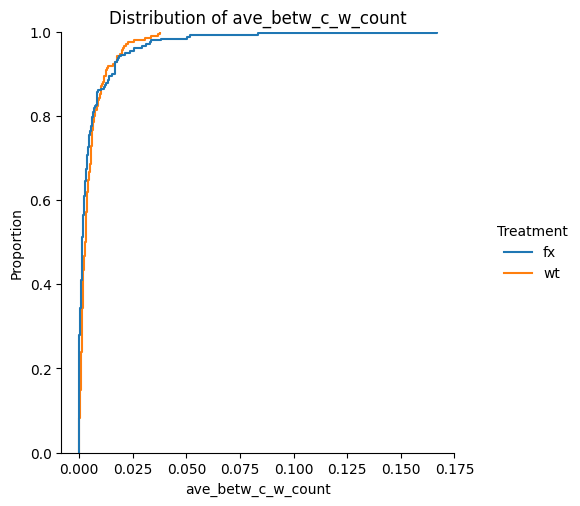

<Figure size 600x400 with 0 Axes>

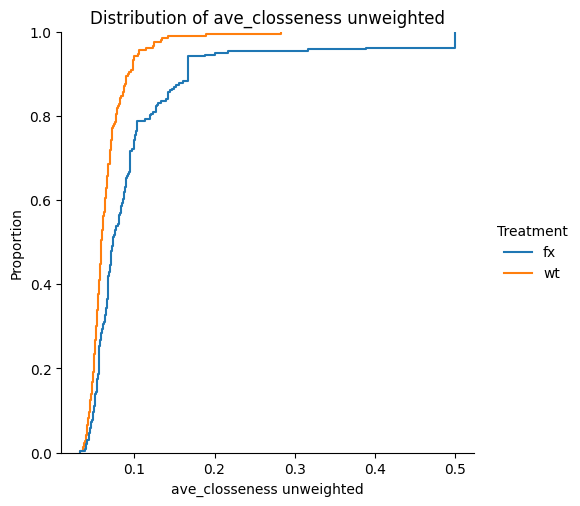

<Figure size 600x400 with 0 Axes>

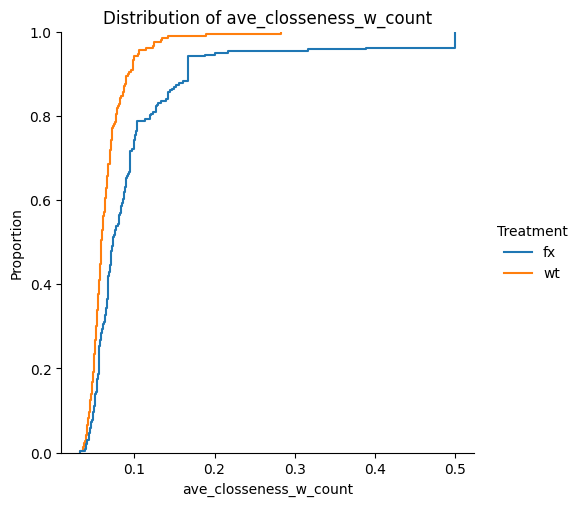

<Figure size 600x400 with 0 Axes>

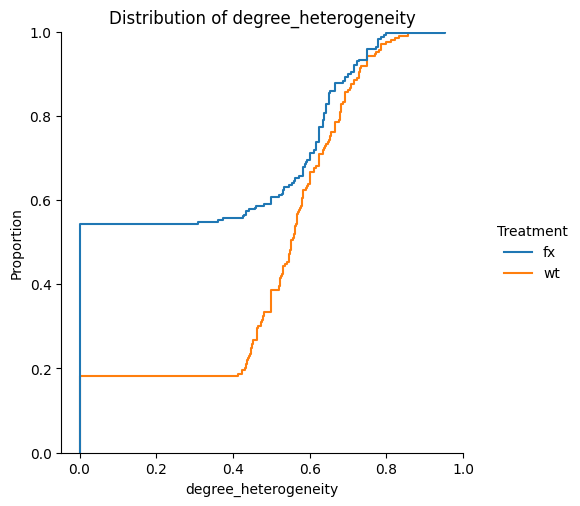

<Figure size 600x400 with 0 Axes>

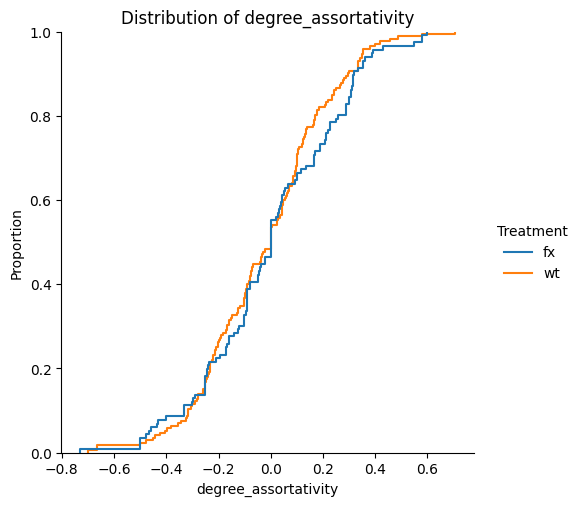

<Figure size 600x400 with 0 Axes>

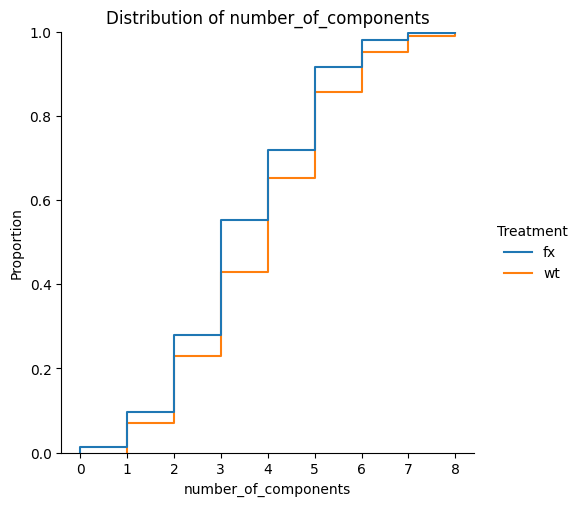

<Figure size 600x400 with 0 Axes>

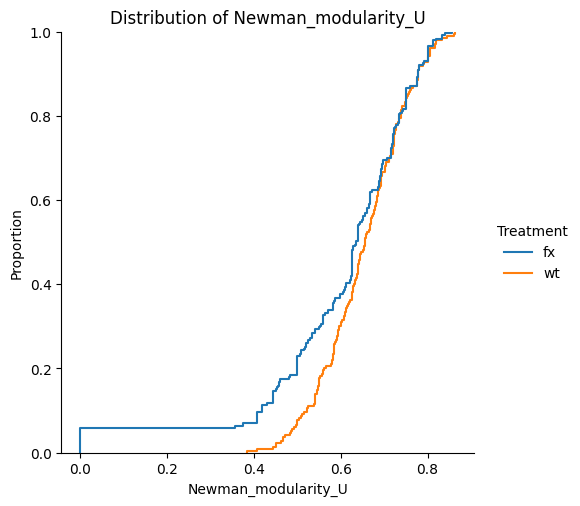

<Figure size 600x400 with 0 Axes>

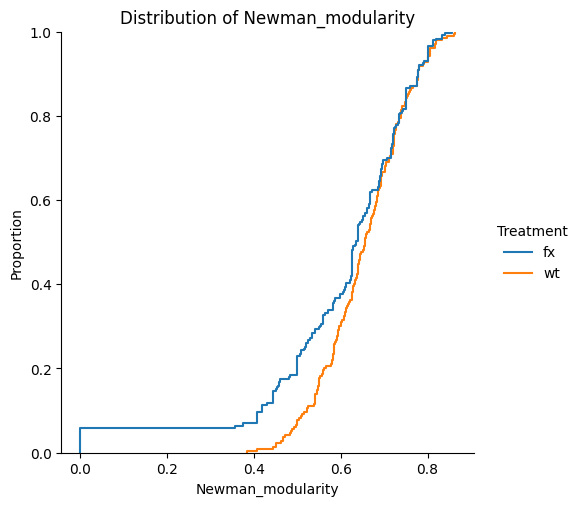

<Figure size 600x400 with 0 Axes>

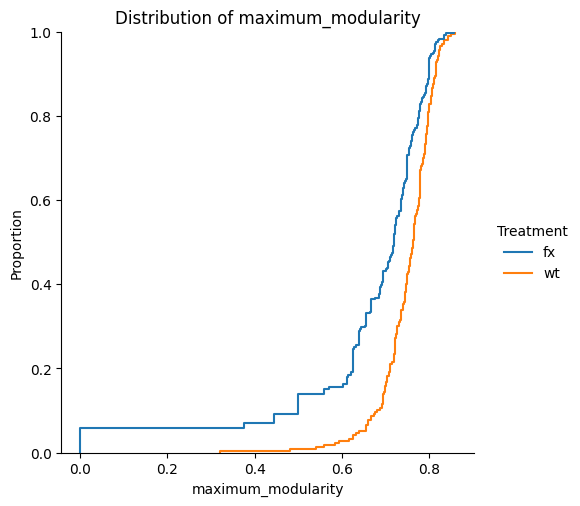

<Figure size 600x400 with 0 Axes>

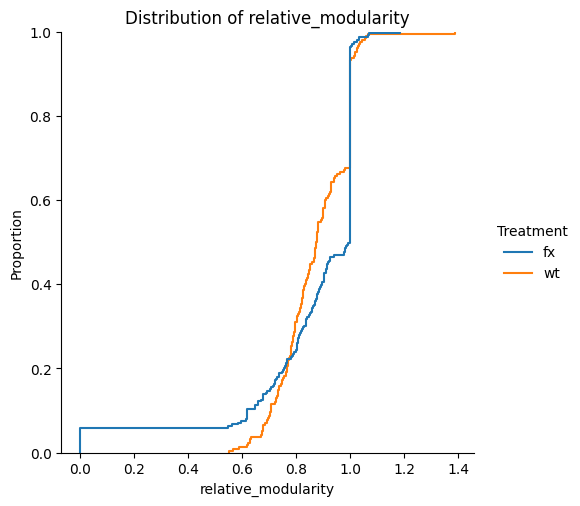

<Figure size 600x400 with 0 Axes>

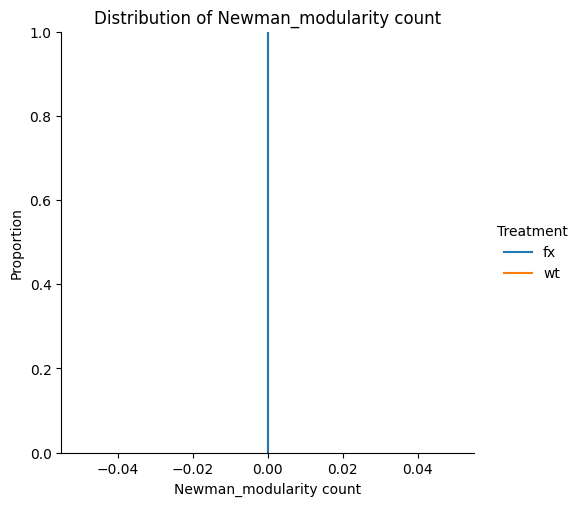

<Figure size 600x400 with 0 Axes>

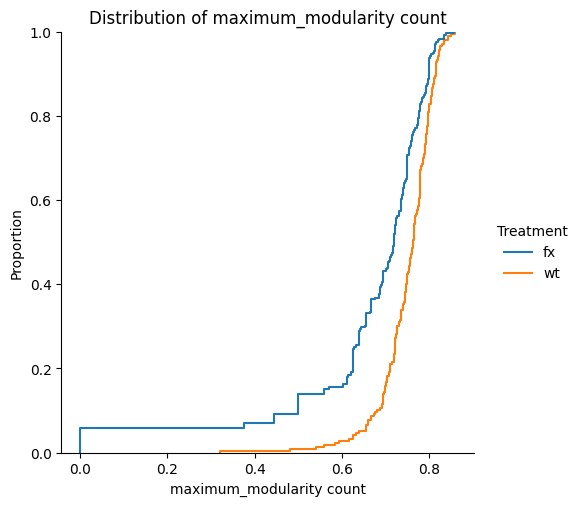

<Figure size 600x400 with 0 Axes>

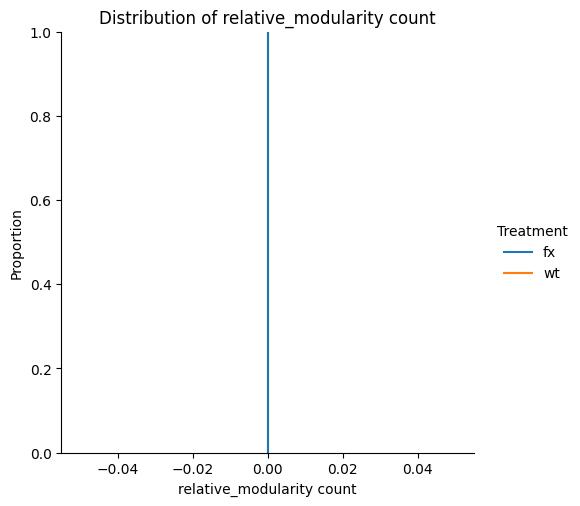

In [6]:
for measure_name in combined_data.columns:
    plt.figure(figsize=(6, 4))
    sns.displot(combined_data, x=measure_name, hue="Treatment", kind="ecdf") 
    plt.xlabel(measure_name)
    plt.ylabel('Proportion')
    plt.title(f'Distribution of {measure_name}')
    plt.show()

## Bivariate distributions

In [12]:
combined_data.columns

Index(['total_nodes', 'total_edges', 'ave_degree', 'ave_strength_count',
       'edges_ave', 'network_density', 'shortest_path_len', 'diameter',
       'reach', 'global_efficiency', 'ave_cl_coeff_unweighted',
       'ave_cl_coeff_w_count', 'transitivity', 'ave_deg_centrality',
       'ave_betw_cent_unweighted', 'ave_betw_c_w_count',
       'ave_closseness unweighted', 'ave_closseness_w_count',
       'degree_heterogeneity', 'degree_assortativity', 'number_of_components',
       'Newman_modularity_U', 'Newman_modularity', 'maximum_modularity',
       'relative_modularity', 'Newman_modularity count',
       'maximum_modularity count', 'relative_modularity count'],
      dtype='object')

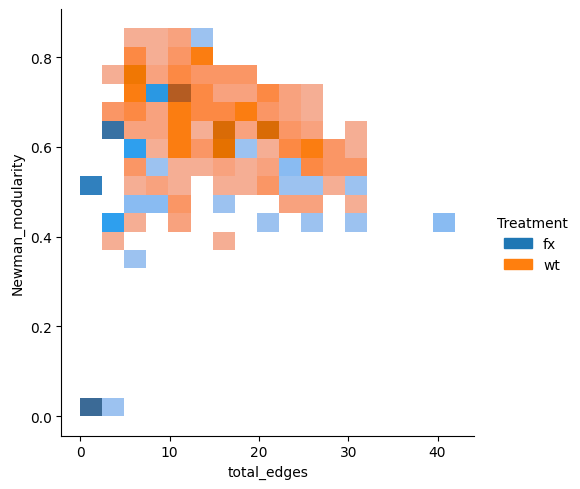

In [7]:
sns.displot(combined_data, x="total_edges", y="Newman_modularity", hue="Treatment")

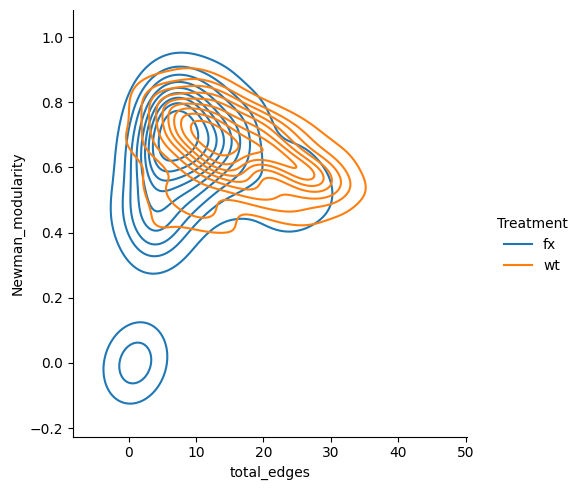

In [8]:
sns.displot(combined_data, x="total_edges", y="Newman_modularity", hue="Treatment", kind="kde")

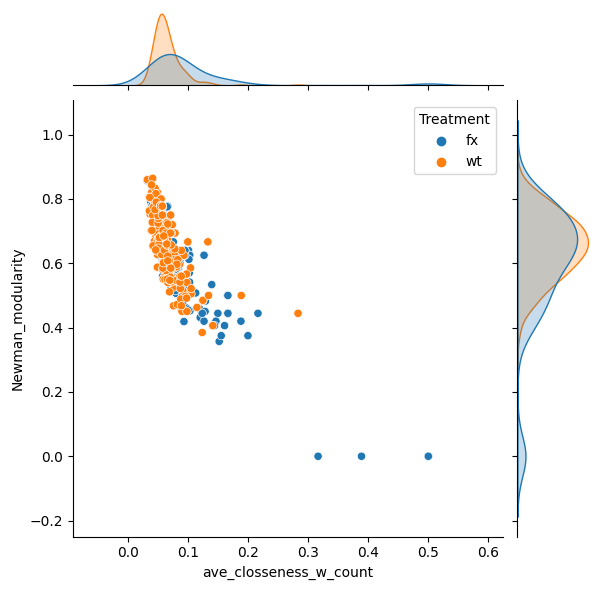

In [9]:
sns.jointplot(combined_data, x="ave_closseness_w_count", y="Newman_modularity", hue="Treatment")

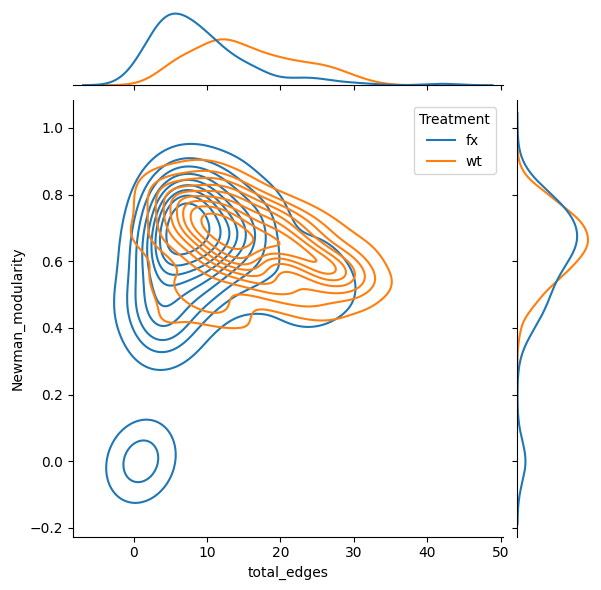

In [10]:
sns.jointplot(combined_data, x="total_edges", y="Newman_modularity", hue="Treatment", kind="kde")

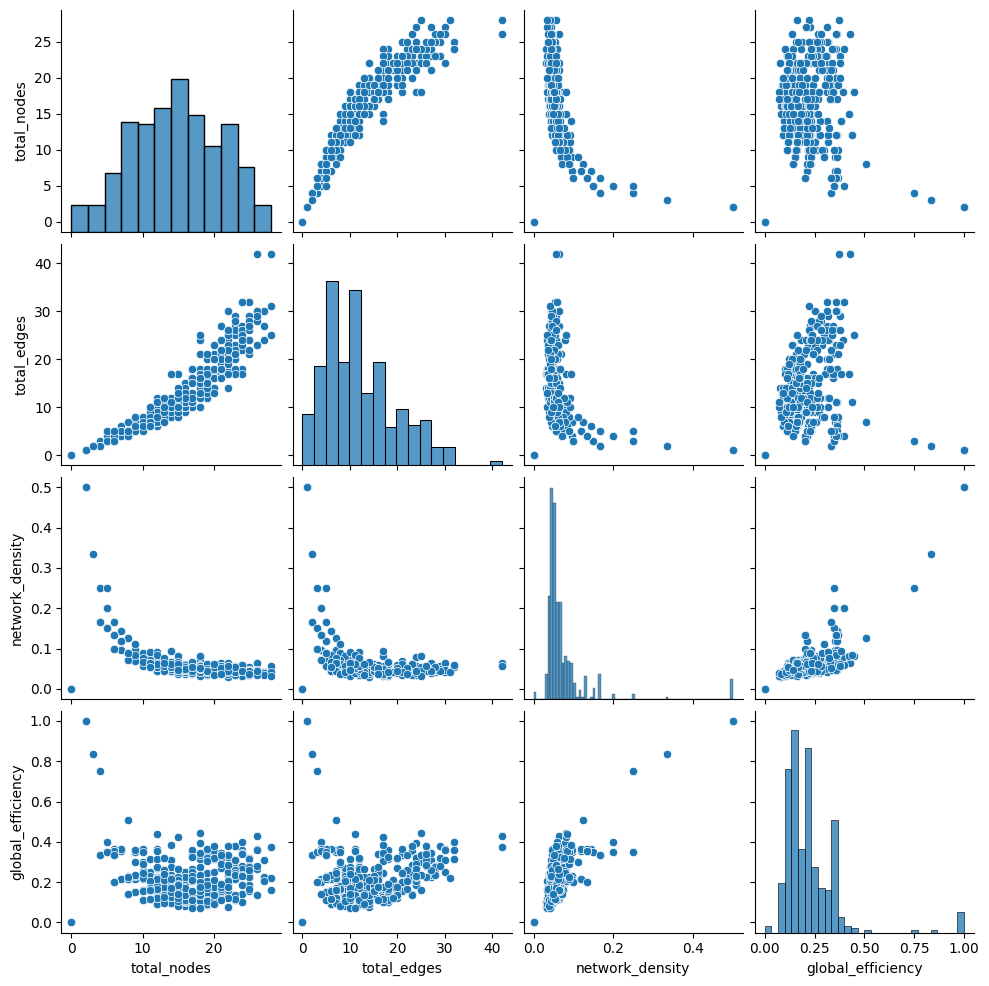

In [11]:
test = combined_data[['total_nodes', 'total_edges', 'network_density', 'global_efficiency']]
sns.pairplot(test)

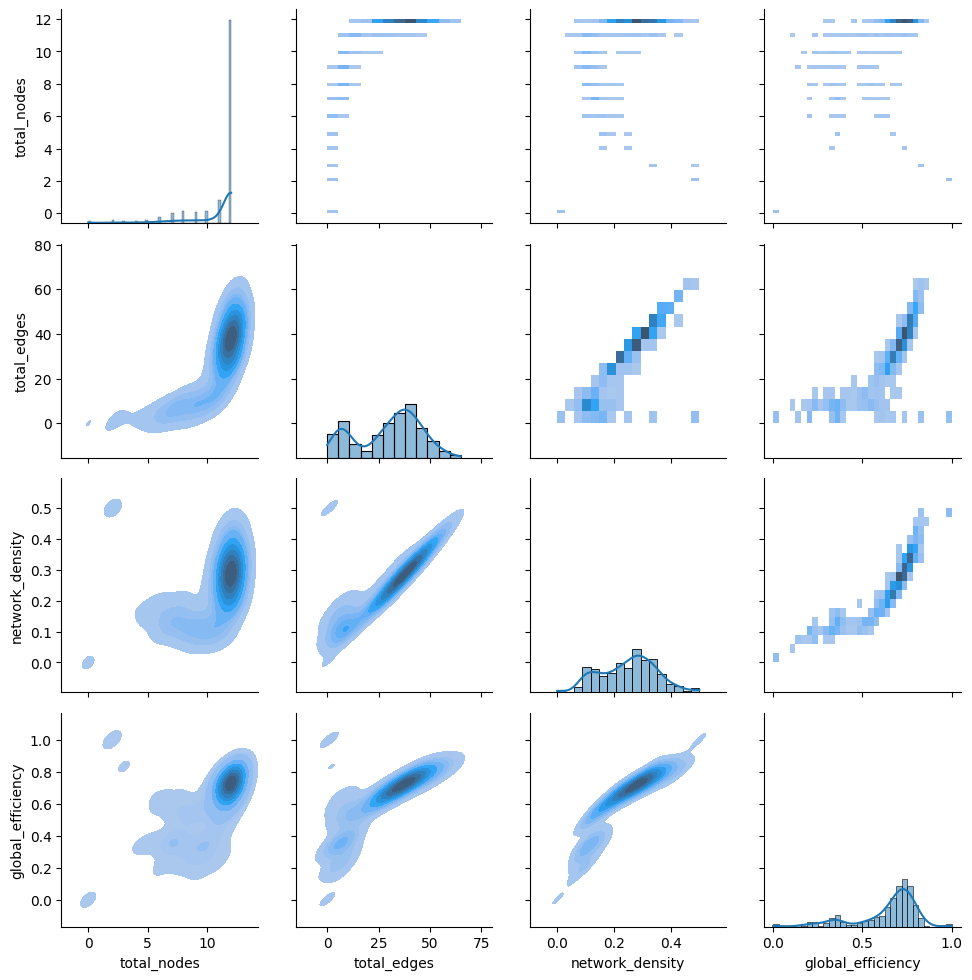

In [ ]:
test = combined_data[['total_nodes', 'total_edges', 'network_density', 'global_efficiency']]
g = sns.PairGrid(test)
g.map_upper(sns.histplot)
g.map_lower(sns.kdeplot, fill=True)
g.map_diag(sns.histplot, kde=True)